# Microstructural Status of the Corpus Callosum is Associated with Bimanual Motor Performance in Chronic Stroke Survivors

## *Rini Varghese, Brianna Chang, Bokkyu Kim, Sook-Lei Liew, Nicolas Schweighofer, and Carolee J Winstein*
### Division of Biokinesiology & Physical Therapy, University of Southern California, Los Angeles, CA

***Transcallosal diaschisis*** is a form of transhemispheric diaschisis in which the ischemic event in the lesioned cortex triggers structural and functional alterations in its contralateral homolog through the corpus callosum. Although the exact mechanism of transhemispheric diaschisis in humans is not well understood, evidence from animal model suggests reorganization in the intact cortex to be an important process (see theoretical model below from [Jones & Adkins, 2015, Physiology](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4556825/). 
Reinnervation accomplished during this time through the sprouting of collaterals from existing axons rather than the genesis of new long-distance neurons, and so is most likely to alter the microstructure and connectivity of local axon pools within a given region. Here, we examine the microstructural status of callosal white matter in chronic stroke survivors and its association with bimanual task performance.

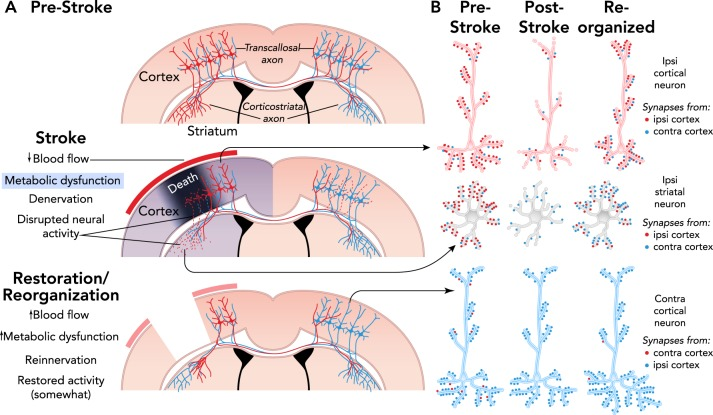


## Purpose & Hypothesis
1) To examine the relationship between performance on a real-world bimanual task and FA of the CC in chronic stroke survivors. We hypothesized that lower FA in both the sensorimotor and non-sensorimotor regions would correspond with poorer performance on the bimanual task. 

2) To examine FA reductions in chronic stroke survivors by comparing the microstructural status of the CC to that of age-similar controls. We hypothesize that compared to controls, FA will be significantly reduced in all regions of the CC, including the non-sensorimotor regions. 


In [1]:
library(IRdisplay)
display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

# Load Packages

In [1]:
rm(list=ls())

ReqdLibs = c("repr","ggplot2","IRdisplay","psych","GGally","ggpubr","gghalves","patchwork","lme4","MASS","lmerTest","rstatix","car",
             "huxtable","boot","broom","ggExtra","emmeans","dplyr","tidyr","boot","stargazer","table1","lmtest","purrr","visreg","grid")
suppressMessages(invisible(lapply(ReqdLibs, library, character.only = TRUE)))

setFigThm = theme_pubclean() + 
            theme(text = element_text(colour = "black",size=20), 
                  plot.title = element_text(colour = "black",size = 25),
                  axis.ticks.length = unit(0.35,"cm"),
                  axis.line = element_line(colour = "black",size=0.75),
                  axis.ticks = element_line(colour = "black",size=0.75),
                  axis.text = element_text(colour = "black",size=20),
                  strip.text.x = element_text(size = 20),
                  legend.text=element_text(size=15),
                  legend.position="top") 


display_html('Necessary packages have been loaded. Figure theme is set.')

Necessary packages have been loaded. Figure theme is set.

*** 
# Table 1: Demographics

In [2]:
demo = read.csv("0_demo_only.csv")
head(demo,3)
tail(demo,3)

subjID,grp,batch,sex,age,sol,chron,lesionVol,uefm
gync_3001,younger,upc,male,34,,NA,NA,NA
gync_3002,younger,upc,female,20,,NA,NA,NA
gync_3003,younger,upc,female,29,,NA,NA,NA


,subjID,grp,batch,sex,age,sol,chron,lesionVol,uefm
91,dose_2039,stroke,hsc,male,69,RHD,0.6630137,4.524,19
92,dose_2040,stroke,hsc,male,72,RHD,4.0575342,3.425,37
93,dose_2041,stroke,hsc,female,55,LHD,0.5369863,26.205,42


In [3]:
demo$grp <- factor(demo$grp, levels=c('younger','older','stroke'),labels = c("Younger","Older","STROKE"))
demo$sex <- factor(demo$sex, levels=c('female','male'),labels=c("Female", "Male"))

demoSub1 = demo[demo$grp!="Younger",]
demoSub2 = demo[demo$grp=="Stroke",]

strata <- c(split(demo, demo$grp)) #,split(demoSub2,demoSub2$sol)

rndr <- function(x, name, ...) {
    if (!is.numeric(x)) return(render.categorical.default(x,render.missing=c("-")))
    what <- switch(name,
        uefm = "Median [Min, Max]",
        age  = "Mean (SD)",
        chron = "Median [Min, Max]",
        lesionVol = "Median [Min, Max]")
    parse.abbrev.render.code(c("", what))(x)
}

                 
labels <- list(variables=list(age="Age (years)", sex="Sex", chron="Chronicity (years)",
                              uefm="UE Fugl-Meyer (/66)",lesionVol="Lesion Volume (cc)"),
               groups=list("CONTROLS","",""))

Table1 = table1(strata, labels,groupspan = c(2,1,1),render = rndr)
display_html(Table1)
# quantile(demoSub2$uefm)
# quantile(demoSub2$chron)

,CONTROLS,,
,Younger(N=28),Older(N=24),STROKE(N=41)
Age (years),,,
,,,
Mean (SD),24.4 (5.07),67.0 (5.55),59.1 (13.1)
Sex,,,
Female,9 (32.1%),9 (37.5%),11 (26.8%)
Male,19 (67.9%),15 (62.5%),30 (73.2%)
Chronicity (years),,,
,,,
"Median [Min, Max]",NA,NA,"1.90 [0.474, 14.4]"


## A. Comparing age & sex among all 3 groups AND between stroke survivors & controls

In [4]:
# AGE
display_markdown("**AGE among all 3 groups & pairwise comparisons**")
anova(lm(age~grp,data=demo)) %>% mutate_if(is.numeric, round, 3)
aov(lm(age~grp,data=demo)) %>% 
# difference between stroke and age-similar controls
tukey_hsd() %>% mutate_if(is.numeric, round, 3)


**AGE among all 3 groups & pairwise comparisons**

Df,Sum Sq,Mean Sq,F value,Pr(>F)
2,28629.930,14314.965,156.733,0
90,8220.027,91.334,NA,NA


term,group1,group2,estimate,conf.low,conf.high,p.adj,p.adj.signif
grp,Younger,Older,42.565,36.230,48.901,0.000,****
grp,Younger,STROKE,34.729,29.146,40.313,0.000,****
grp,Older,STROKE,-7.836,-13.690,-1.983,0.006,**


In [11]:
# SEX
display_markdown("**SEX among all 3 groups**")
tidy(kruskal.test(sex ~ grp, data = demo))

# difference between stroke and age-similar controls
display_markdown("**SEX between stroke survivors and controls**")
tidy(kruskal.test(sex ~ grp, data = demoSub1))

**SEX among all 3 groups**

statistic,p.value,parameter,method
0.8116486,0.6664272,2,Kruskal-Wallis rank sum test


**SEX between stroke survivors and controls**

statistic,p.value,parameter,method
0.796748,0.3720675,1,Kruskal-Wallis rank sum test


## B. Comparing age, sex, uefm, chronicity, lesion volume between left stroke and right stroke survivors

In [19]:
# demo
demoSub2 = demo[demo$grp=="STROKE",]
# demoSub2
#age
display_markdown("**AGE**")
aov(lm(age~sol,data=demoSub2)) %>% tukey_hsd()
#sex
display_markdown("**SEX**")
tidy(kruskal.test(sex ~ sol, data = demoSub2))
#uefm
display_markdown("**UEFM**")
aov(lm(uefm~sol,data=demoSub2)) %>% tukey_hsd()
#chron
display_markdown("**CHRONICITY**")
aov(lm(chron~sol,data=demoSub2)) %>% tukey_hsd()
# lesion volume
display_markdown("**LESION VOLUME**")
aov(lm(lesionVol~sol,data=demoSub2)) %>% tukey_hsd() 

**AGE**

term,group1,group2,estimate,conf.low,conf.high,p.adj,p.adj.signif
sol,LHD,RHD,-5.327751,-13.52292,2.867417,0.196,ns


**SEX**

statistic,p.value,parameter,method
0.3969842,0.5286509,1,Kruskal-Wallis rank sum test


**UEFM**

term,group1,group2,estimate,conf.low,conf.high,p.adj,p.adj.signif
sol,LHD,RHD,1.691388,-5.412638,8.795413,0.633,ns


**CHRONICITY**

term,group1,group2,estimate,conf.low,conf.high,p.adj,p.adj.signif
sol,LHD,RHD,0.79745,-1.134997,2.729897,0.409,ns


**LESION VOLUME**

term,group1,group2,estimate,conf.low,conf.high,p.adj,p.adj.signif
sol,LHD,RHD,19.45388,-0.3115642,39.21933,0.0535,ns


***
# Analysis 1: Relationship between CC microstructure and bimanual behavior in chronic stroke survivors

## 1. Import & Reorganize Data

In [20]:
bmCC = read.csv("1_stroke_bmCC_corr.csv")

# filtering out 
bmCC  %>% 
filter(strat=="bimanual") %>% 
# select(-c(IpPrAvg,IpDistAvg,CoPrAvg)) %>% 
filter(taskC=="let") %>% 

{.->>bmCC_le}

bmCC_le %>% 
pivot_longer(cols = c("cc1","cc2","cc3","cc4","cc5"),"CC_region",values_to = "FA_val")%>% 
{.->> bmCC_le2}

head(bmCC_le2,10) %>% mutate_if(is.numeric, round, 3) 
dim(bmCC_le2)
# bmCC_le2

range(bmCC_le$cc1)


subjID,sol,sex,age,taskC,task,strat,mt,chronicity,lesionVol,⋯,cst_ll,ventr_ai,lesion_fa,IpPrAvg,IpDistAvg,CoPrAvg,CoDistAvg,norm_ccVol,CC_region,FA_val
dose_2001,RHD,male,61,let,le,bimanual,23.156,1.175,112.244,⋯,1.2,-0.212,0.137,0.759,2.876,0.940,5.959,1.503,cc1,0.545
dose_2001,RHD,male,61,let,le,bimanual,23.156,1.175,112.244,⋯,1.2,-0.212,0.137,0.759,2.876,0.940,5.959,1.503,cc2,0.498
dose_2001,RHD,male,61,let,le,bimanual,23.156,1.175,112.244,⋯,1.2,-0.212,0.137,0.759,2.876,0.940,5.959,1.503,cc3,0.542
dose_2001,RHD,male,61,let,le,bimanual,23.156,1.175,112.244,⋯,1.2,-0.212,0.137,0.759,2.876,0.940,5.959,1.503,cc4,0.607
dose_2001,RHD,male,61,let,le,bimanual,23.156,1.175,112.244,⋯,1.2,-0.212,0.137,0.759,2.876,0.940,5.959,1.503,cc5,0.758
dose_2003,RHD,male,67,let,le,bimanual,11.280,1.715,0.821,⋯,0.2,-0.186,0.232,0.440,2.147,0.493,2.328,1.675,cc1,0.709
dose_2003,RHD,male,67,let,le,bimanual,11.280,1.715,0.821,⋯,0.2,-0.186,0.232,0.440,2.147,0.493,2.328,1.675,cc2,0.669
dose_2003,RHD,male,67,let,le,bimanual,11.280,1.715,0.821,⋯,0.2,-0.186,0.232,0.440,2.147,0.493,2.328,1.675,cc3,0.639
dose_2003,RHD,male,67,let,le,bimanual,11.280,1.715,0.821,⋯,0.2,-0.186,0.232,0.440,2.147,0.493,2.328,1.675,cc4,0.752
dose_2003,RHD,male,67,let,le,bimanual,11.280,1.715,0.821,⋯,0.2,-0.186,0.232,0.440,2.147,0.493,2.328,1.675,cc5,0.845


[1] 270  23

[1] 0.545289 0.803799

## 2. Visualize relationship between CC FA and bimanual movement time

* Lower FA, and not a loss of callosal volume, explains slower movement times when both hands are used.
* The degree of direct lesion to the CST and asymmetry in lateral ventricle volume explain part of the variance in bimanual movement time in addition to CC microstructure.
* Microstructural status of non-sensorimotor regions is also associated with bimanual motor performance.

## Individual-unadjusted fits from raw data

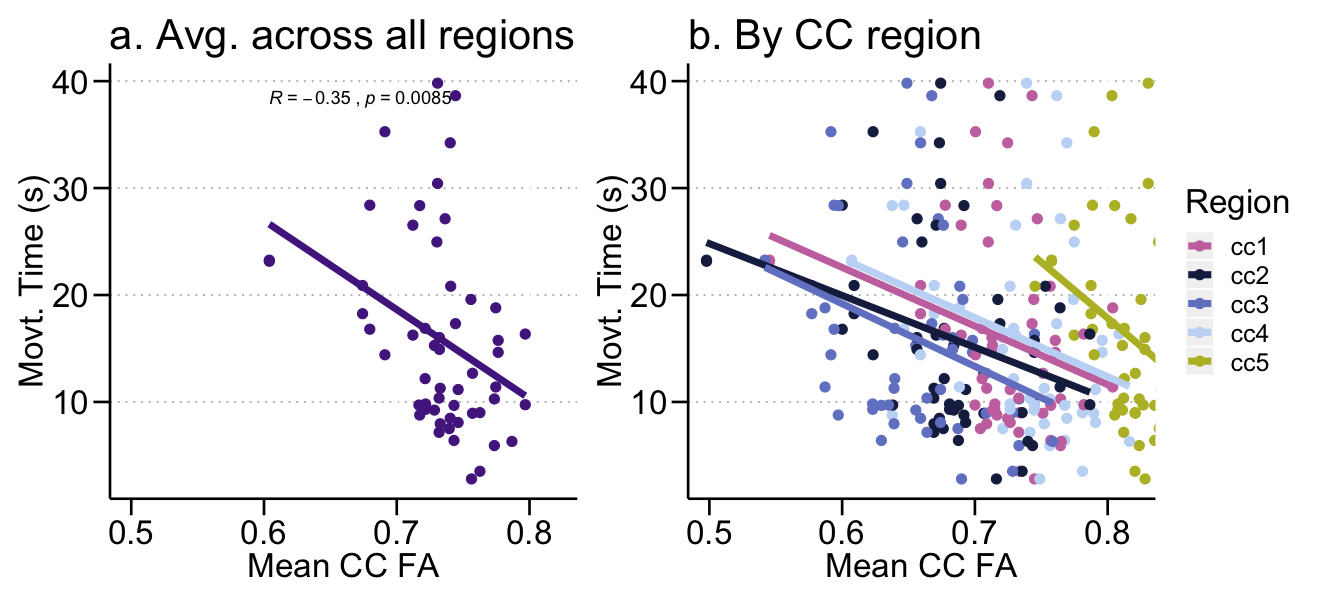

In [21]:
options(repr.plot.width=11, repr.plot.height=5)
new_cols <- c("#C874AE", "#19264E", "#7384CB", "#C2D9F5", "#B8BA2F")


gx1 = ggplot(bmCC_le, aes(y = mt, x = fullCC)) +

geom_point(col = "#54278f",size=2.5,show.legend = TRUE) +
geom_smooth(fill= NA ,size = 2, col = "#54278f", method="lm") + 
stat_cor() + 
coord_cartesian(xlim = c(0.5,0.82),expand = -0.01) + 
xlab("Mean CC FA") + ylab("Movt. Time (s)") + ggtitle("a. Avg. across all regions") +  
theme_classic2() + setFigThm


gx2 = ggplot(bmCC_le2, aes(y = mt, x = FA_val,col = CC_region)) +

geom_point(aes(col = CC_region),size=2.5,show.legend = TRUE) +
geom_smooth(fill = NA,alpha = 0.2, size = 2,method="lm") + 
coord_cartesian(xlim = c(0.5,0.82),expand = -0.01) + 
xlab("Mean CC FA") + ylab("Movt. Time (s)") + ggtitle("b. By CC region") + 
scale_color_manual(values = new_cols,name = "Region",labels = c("cc1", "cc2","cc3","cc4","cc5")) + 
scale_fill_manual(values = new_cols,name = "Region",labels = c("cc1", "cc2","cc3","cc4","cc5")) + 
theme_classic2() + setFigThm + theme(legend.position="right") 

display_markdown("## Individual-unadjusted fits from raw data")

gx1 | gx2



## 3. Plot & Test Distributions

## Shapiro-Wilk's Test:

* **for demographic variables**

variable,statistic,p
age,0.967,0.162
chronicity,0.719,0.000
mt,0.907,0.001
uefm,0.943,0.015


* **for CC-specific variables**

variable,statistic,p
fullCC,0.900,0.000
norm_ccVol,0.969,0.186


* **for other variables of structural damage**

variable,statistic,p
cst_fa_ai,0.980,0.523
cst_ll,0.654,0.000
lesion_fa,0.950,0.029
lesionVol,0.700,0.000
ventr_ai,0.962,0.094


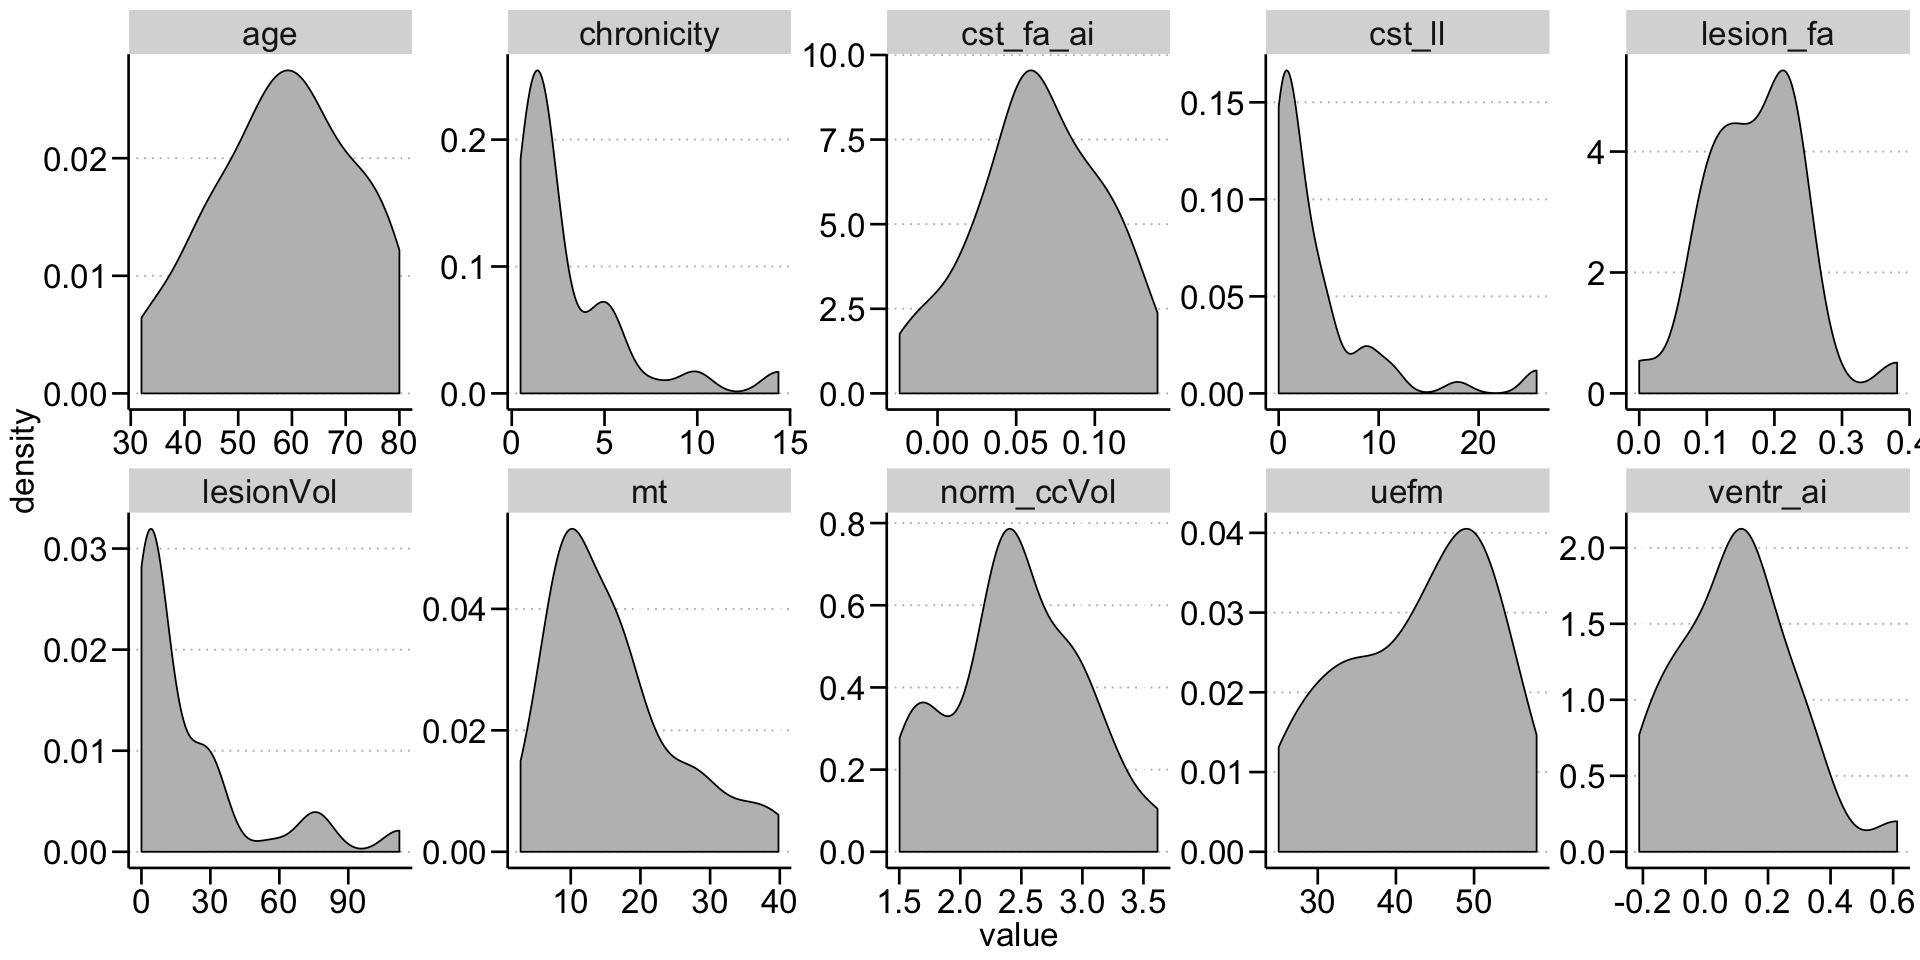

In [22]:
# Plot densities
options(repr.plot.width=16, repr.plot.height=8)

bmCC_le %>%
  select(age,chronicity,uefm,mt,norm_ccVol,lesionVol,cst_fa_ai,cst_ll,ventr_ai,lesion_fa) %>% 
  keep(is.numeric) %>% 
  drop_na() %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free",ncol = 5) +
    geom_density(fill = "gray") + setFigThm

bmCC_le %>%
  keep(is.numeric) %>% 
  drop_na() %>% 
{.->> swTesting}

# Shapiro-Wilk Tests by type of variable
display_markdown("## Shapiro-Wilk's Test:")
display_markdown("* **for demographic variables**")
swTesting %>% 
  shapiro_test(age,chronicity,uefm,mt) %>% mutate_if(is.numeric, round, 3)

display_markdown("* **for CC-specific variables**")
swTesting  %>% 
  shapiro_test(fullCC,norm_ccVol) %>% mutate_if(is.numeric, round, 3)

display_markdown("* **for other variables of structural damage**")
swTesting  %>% 
  shapiro_test(lesionVol,cst_fa_ai,cst_ll,ventr_ai,lesion_fa) %>% mutate_if(is.numeric, round, 3)


## 4a. Mixed Effects Linear Model

To test our hypothesis about the relationship between callosal microstructure and bimanual movement time, the following is our **base model**:

***log* (MT) ~ mean FA + mean FA : CC region + <font color = 'green'> (1 | CC region : Subject) </font>**

* We include FA as our main fixed effects, and suspect that the relationship between FA and movt. time might be moderated by the CC region, so we include an interaction term for that. There is no conceivable reason for mean movt. time to vary based on region independent of the FA value itself. But, in this long-form data, movt. time is repeated 5 times (over CC region), so we need to estimate the variance in intercept related to region-wise and subject-wise random efffects. <br><br>
* Note: The last random-effects term allows for an "additive" shift for each (observed) combination of CC region and subject. In other words, this esssentially allows the random intercepts to interact, so say Subj1 could have CC5>CC3 and Subj3 could have CC3>CC5. The variance will be estimated for both region and region x subj. 

### Best subset selection: Forward, then Backward stepwise selection of predictors.
To this model, we will first add the following covariates in a forward step-wise manner: <br>
1. *log* (Chronicity) <br>
2. UEFM <br>
3. Age <br>
4. Sex
5. Side of lesion
6. Total normalized CC volume ("norm_ccVol") <br>
    
Those covariates that meet a liberal criterion of p <= 0.1 will be preserved in a combined model. The combined model will then be tested by backward stepwise selection process to finally preserve only those variables which provide a signifiantly more informative model.


In [23]:
display_markdown("**Original default contrasts**")
contrasts(factor(bmCC_le2$CC_region))

display_markdown("**Re-leveled contrasts to make motor CC as reference**")
bmCC_le2$CC_region = relevel(factor(bmCC_le2$CC_region), ref = "cc3")
contrasts(factor(bmCC_le2$CC_region))


**Original default contrasts**

,cc2,cc3,cc4,cc5
cc1,0,0,0,0
cc2,1,0,0,0
cc3,0,1,0,0
cc4,0,0,1,0
cc5,0,0,0,1


**Re-leveled contrasts to make motor CC as reference**

,cc1,cc2,cc4,cc5
cc3,0,0,0,0
cc1,1,0,0,0
cc2,0,1,0,0
cc4,0,0,1,0
cc5,0,0,0,1


### 4a.1 Forward stepwise

In [24]:

m0 = suppressMessages(lmer(log(mt) ~ FA_val + (FA_val:CC_region) +  (1|CC_region:subjID), data = bmCC_le2,
                       control = lmerControl(optimizer ="Nelder_Mead")))

# uncomment below and summarize forr BASE model
# summary(m0)

# FORWARD (First) Level

m1 = suppressMessages(update(m0, . ~ . + log(chronicity)))

m2 = suppressMessages(update(m0, . ~ . + uefm))  

m3 = suppressMessages(update(m0, . ~ . + age)) 

m4 = suppressMessages(update(m0, . ~ . + sex))  

m5 = suppressMessages(update(m0, . ~ . + sol))

m6 = suppressMessages(update(m0, . ~ . + norm_ccVol))  

# class(m0) <- "lmerMod"
class(m1) <- "lmerMod"
class(m2) <- "lmerMod"
class(m3) <- "lmerMod"
class(m4) <- "lmerMod"
class(m5) <- "lmerMod"
class(m6) <- "lmerMod"



stargazer(m1,m2,m3,m4,m5,m6,type = "text",
          star.char = c("*", "**","***"),
          star.cutoffs = c(.1, .01, .001))




                                        Dependent variable:                    
                    -----------------------------------------------------------
                                              log(mt)                          
                       (1)       (2)       (3)       (4)       (5)       (6)   
-------------------------------------------------------------------------------
FA_val              -4.625*** -4.358*** -4.487*** -4.244*** -4.007*** -3.834***
                     (0.835)   (0.886)   (0.873)   (0.869)   (0.895)   (0.872) 
                                                                               
log(chronicity)     0.173***                                                   
                     (0.040)                                                   
                                                                               
uefm                           -0.0002                                         
                               (0.004) 

### 4a.2 Backward stepwise

In [25]:
# BACKWARD (Second) level
# with all the factors that met signficance criteria above
m11 = suppressWarnings(update(m0, . ~ . + log(chronicity) + norm_ccVol + sex))

# removing sex because it was not significant in m11
m12 = suppressWarnings(update(m0, . ~ . + log(chronicity) + norm_ccVol))

# removing norm_ccVol and comparing with m12
m13 = suppressWarnings(update(m0, . ~ . + log(chronicity) + sex))

class(m11) <- "lmerMod"
class(m12) <- "lmerMod"
class(m13) <- "lmerMod"


stargazer(m11,m12,m13,type = "text",
          star.char = c("*", "**","***"),
          star.cutoffs = c(.05, .01, .001))

# display_markdown("<br> **Looks like m11 & m12 are not different from each other,<br> so we can remove 'sex'**")
# lrtest(m11,m12)%>% mutate_if(is.numeric, round, 3); 
# suppressMessages(anova(m11,m12)) %>% mutate_if(is.numeric, round, 3)

# display_markdown("<br><br> **Looks like m12 & m13 are slightly different from each other based at least on the ANOVA, <br> so we can keep 'norm cc volume'**")
# lrtest(m12,m13)%>% mutate_if(is.numeric, round, 3)
# suppressMessages(anova(m12,m13)) %>% mutate_if(is.numeric, round, 3)



                          Dependent variable:      
                    -------------------------------
                                log(mt)            
                       (1)        (2)        (3)   
---------------------------------------------------
FA_val              -4.167***  -4.201***  -4.567***
                     (0.850)    (0.845)    (0.841) 
                                                   
log(chronicity)      0.147***   0.156***  0.161*** 
                     (0.043)    (0.041)    (0.043) 
                                                   
norm_ccVol           -0.164*    -0.168*            
                     (0.071)    (0.071)            
                                                   
sexmale               0.051                 0.069  
                     (0.087)               (0.088) 
                                                   
FA_val:CC_regioncc1   0.376*     0.379*    0.414*  
                     (0.183)    (0.182)    (0.184) 
           

## 4b.1 FINAL MODEL: 
***log* (MT) ~ Mean FA + Mean FA : CC region + *log* (Chronicity) + Total CC Volume + <font color = 'green'> (1 | CC region : Subject)</font>**


Brain-Behavior Relationship
                         Dependent variable:     
                    -----------------------------
                             Bimanual MT         
-------------------------------------------------
FA_val                    -4.201*** (0.845)      
log(chronicity)           0.156*** (0.041)       
norm_ccVol                 -0.168* (0.071)       
FA_val:CC_regioncc1        0.379* (0.182)        
FA_val:CC_regioncc2         0.167 (0.174)        
FA_val:CC_regioncc4        0.453* (0.188)        
FA_val:CC_regioncc5       0.824*** (0.226)       
Constant                  5.659*** (0.542)       
-------------------------------------------------
Observations                     270             
Log Likelihood                -210.464           
Akaike Inf. Crit.              440.927           
Bayesian Inf. Crit.            476.912           
Note:               *p<0.05; **p<0.01; ***p<0.001


## <br> 4b.2 Model-adjusted fits & predicted values

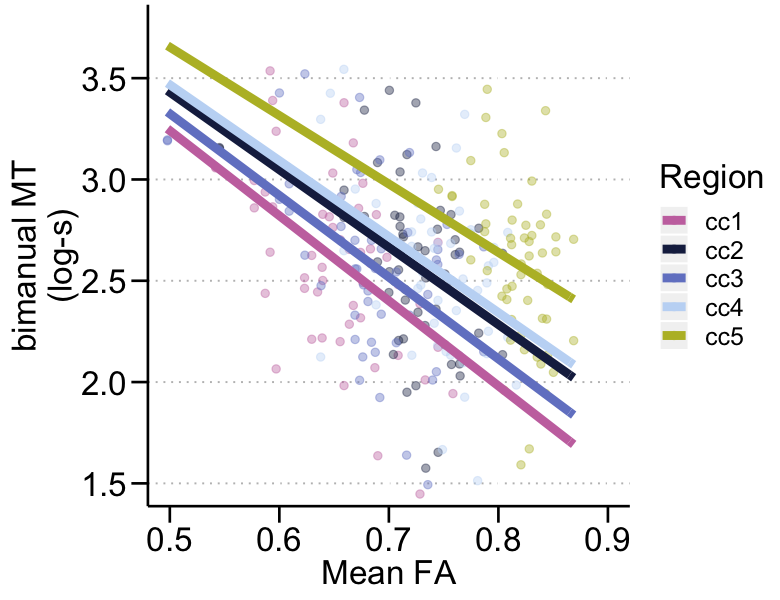

In [26]:
m12 = suppressMessages(lmer(log(mt) ~ FA_val + FA_val:CC_region + log(chronicity) + norm_ccVol +
                                     (1|CC_region:subjID), data = bmCC_le2,
                       control = lmerControl(optimizer ="Nelder_Mead")))

class(m12) <- "lmerMod"

dvNames0 = c('Mean FA','log(Chronicity)','Total Normalized CC Volume',
            'FA: CC2','FA: CC3','FA: CC4','FA: CC5','Intercept')


stargazer(m12,type = "text",
          star.char = c("*", "**","***"),
          star.cutoffs = c(.05, .01, .001),
          digit.separator = "",single.row=TRUE,
          dep.var.labels = c('Bimanual MT'),
#           covariate.labels = dvNames0,
          title = "Brain-Behavior Relationship")

# Plot regression
options(repr.plot.width=6.5, repr.plot.height=5)

new_cols <- c("#C874AE", "#19264E", "#7384CB", "#C2D9F5", "#B8BA2F")

fitted = visreg(m12, xvar = "FA_val", by = "CC_region",
                strip.names = FALSE,
                points=list(size=2,alpha = 0.4),line=list(size=2.5),
                overlay = TRUE, gg = TRUE)

display_markdown("## <br> 4b.2 Model-adjusted fits & predicted values")
Bm=suppressMessages(fitted + scale_color_manual(values = new_cols ,name = "Region",
                                             labels = c("cc1", "cc2","cc3","cc4","cc5")) + 
                           coord_cartesian(xlim = c(0.5,0.9),,ylim=c(1.5,3.75),expand = -0.01) + 
                           labs(x = "Mean FA", y = "bimanual MT\n(log-s)") +                          
                           guides(fill=FALSE) + setFigThm + theme(legend.position="right",
                                                                  plot.margin = unit(c(0.1,0.1,0.25,0.25), "cm")))

Bm

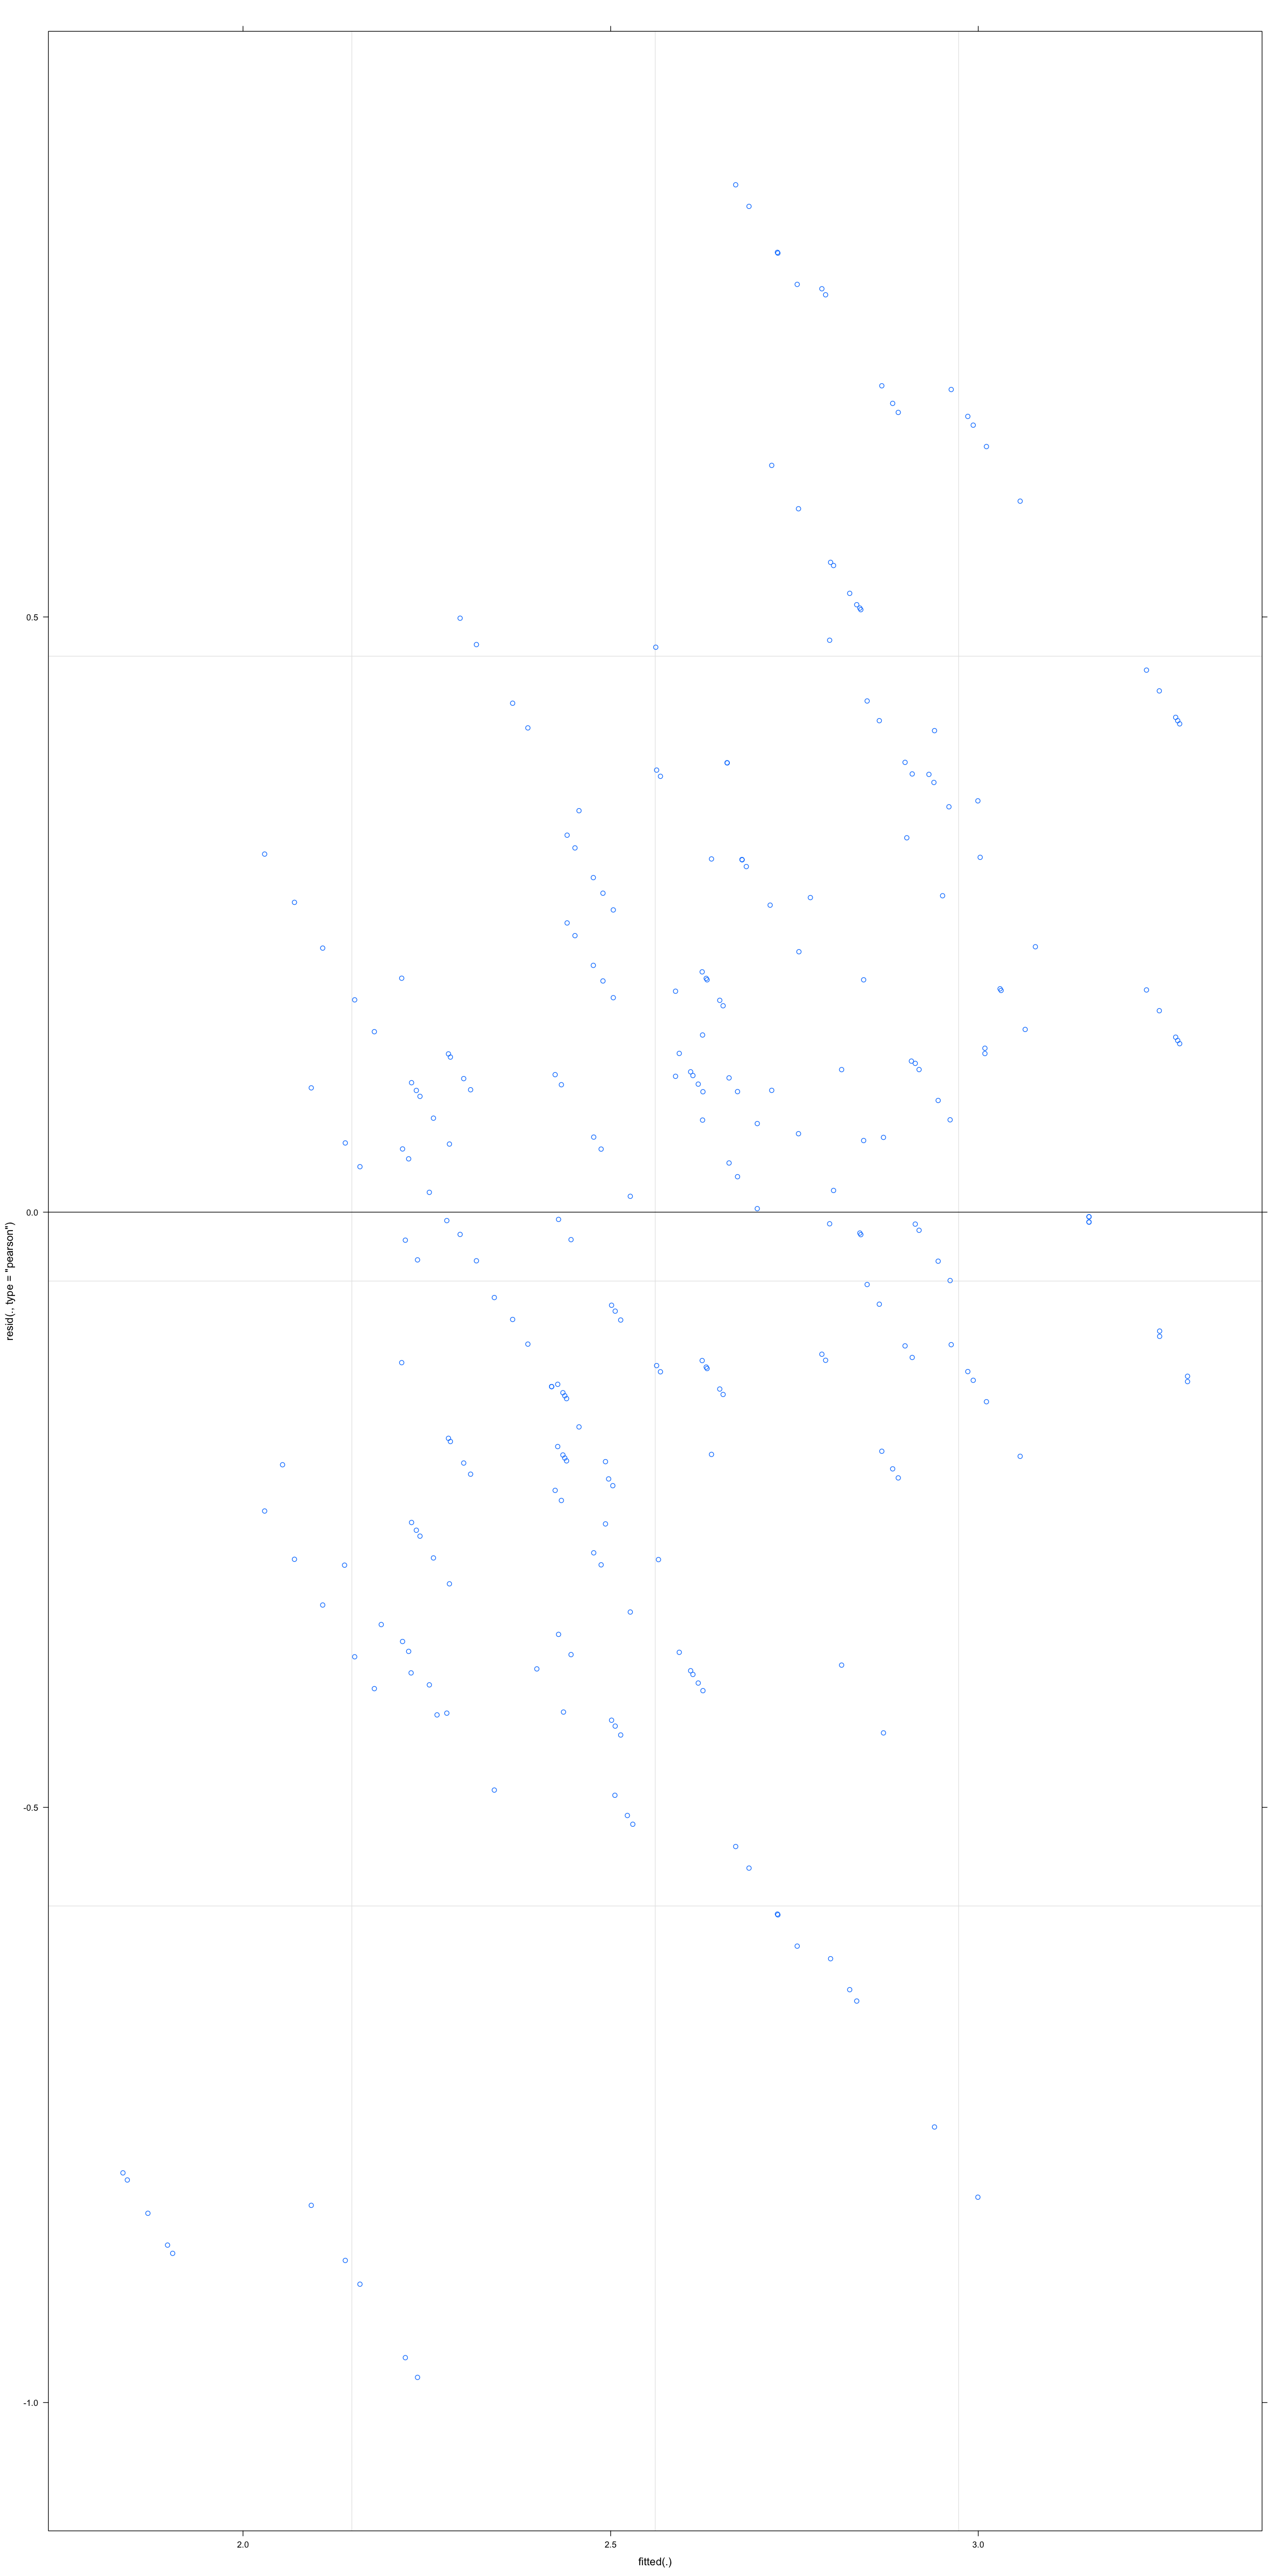

[1] dose_2025 dose_2025 dose_2025 dose_2025 dose_2025
33 Levels: dose_2001 dose_2003 dose_2004 dose_2005 dose_2007 ... dose_2041

[1] 1.765876

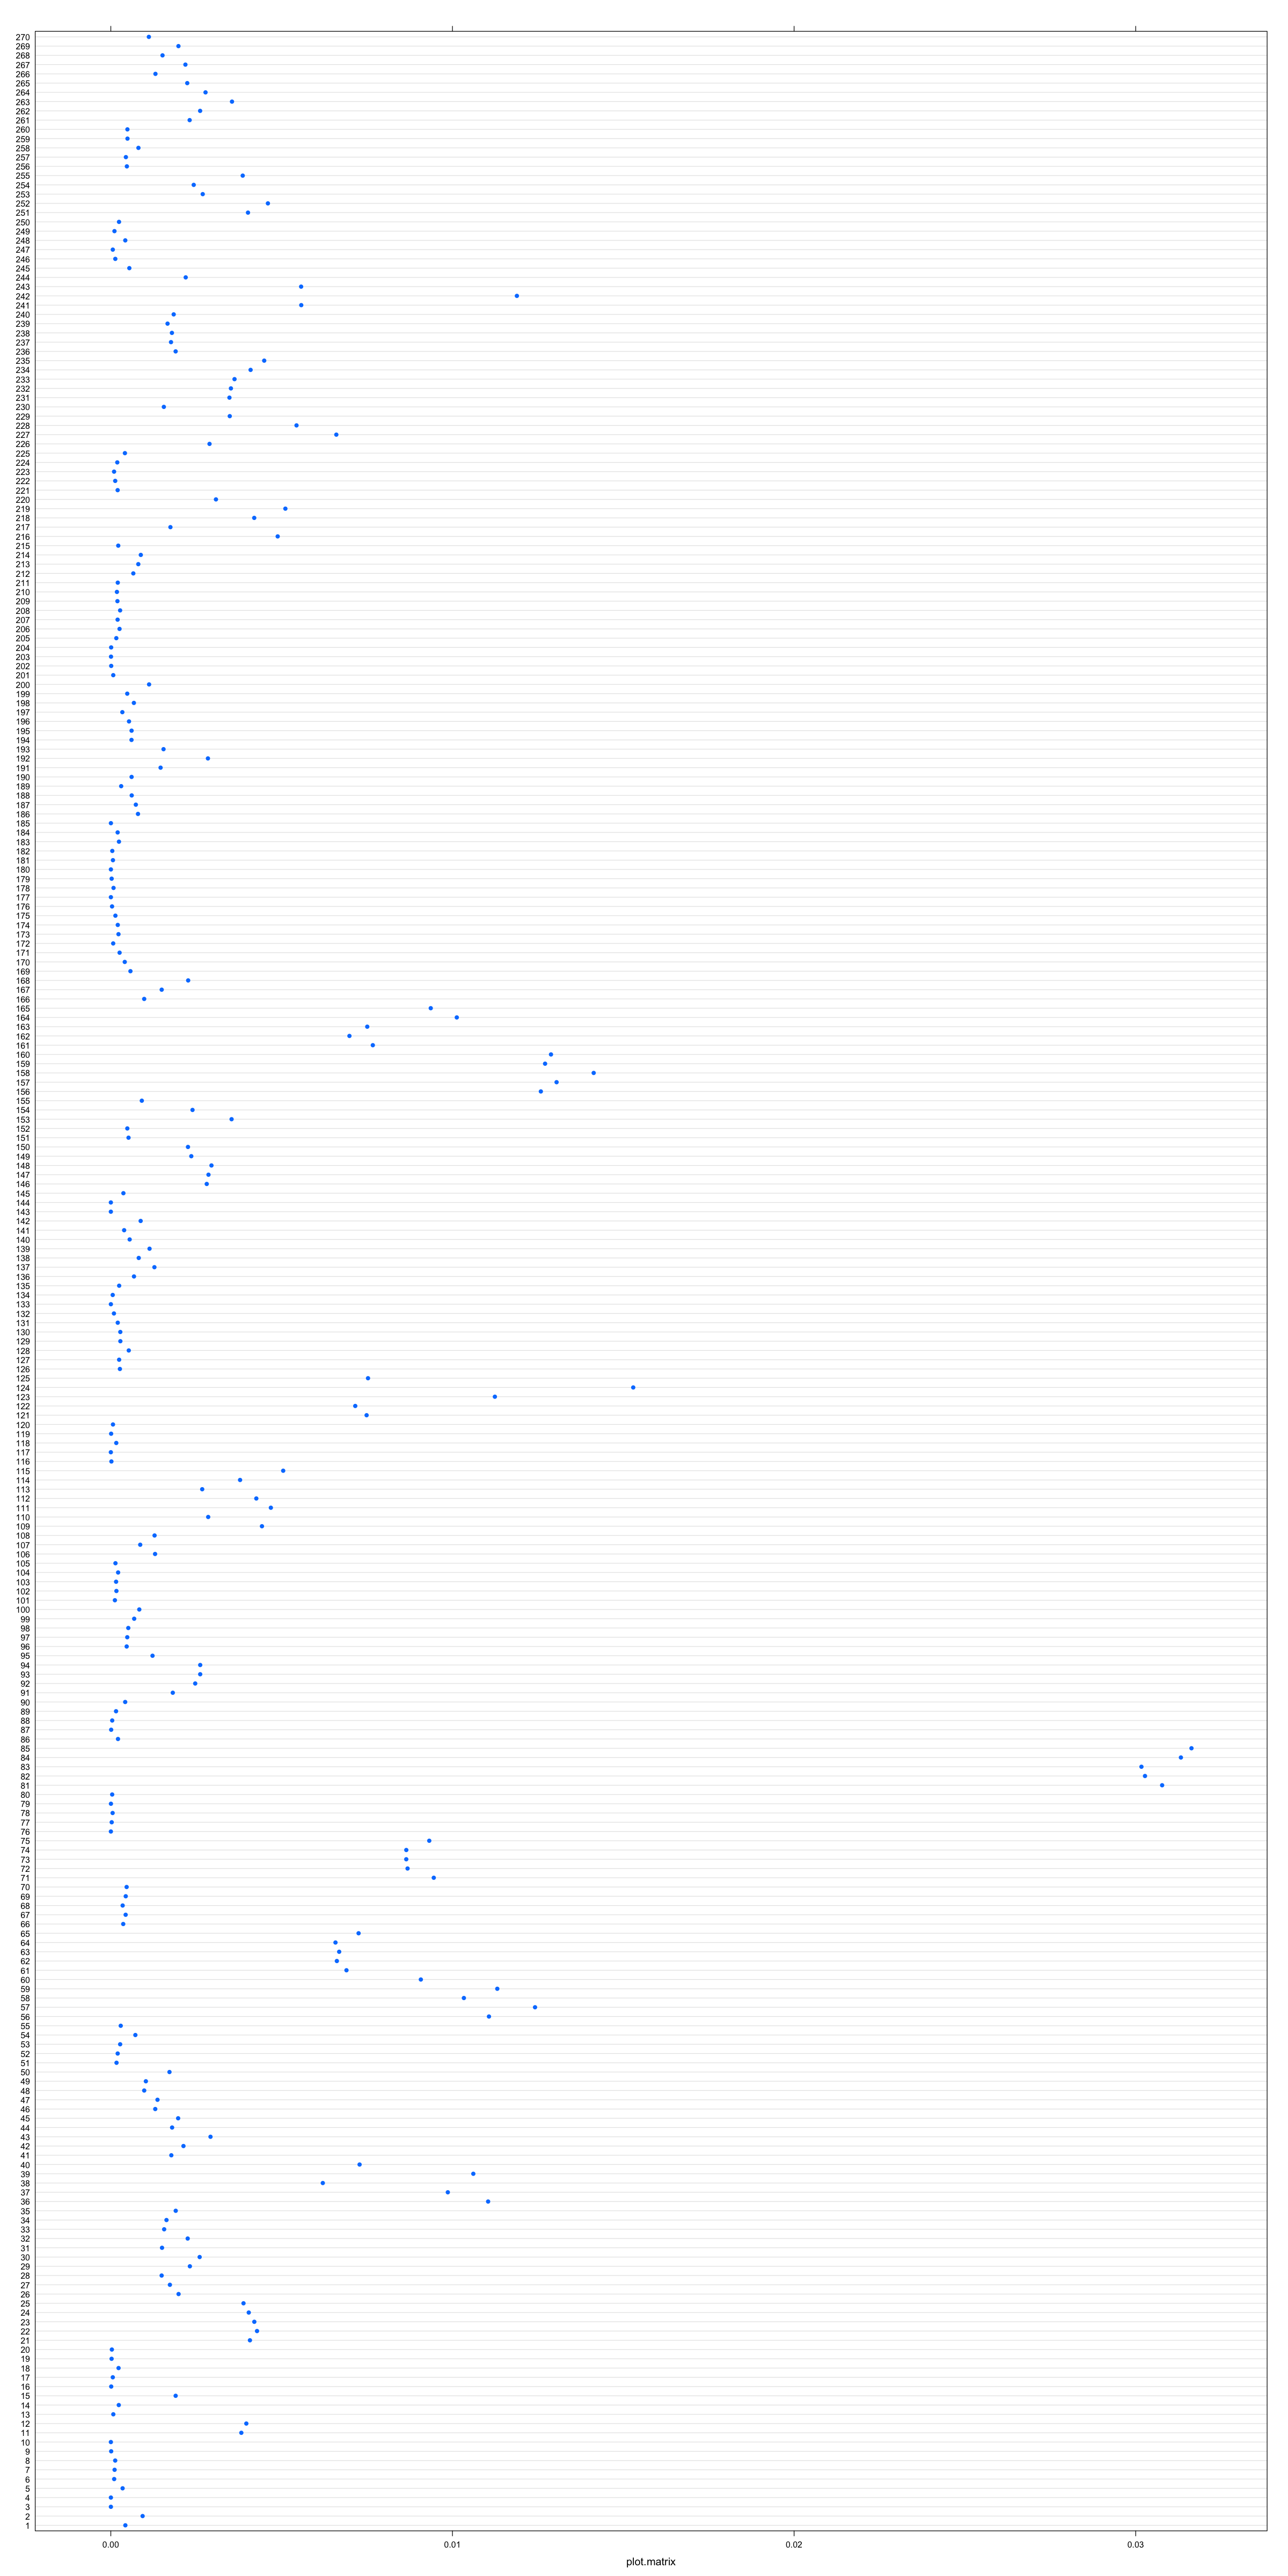

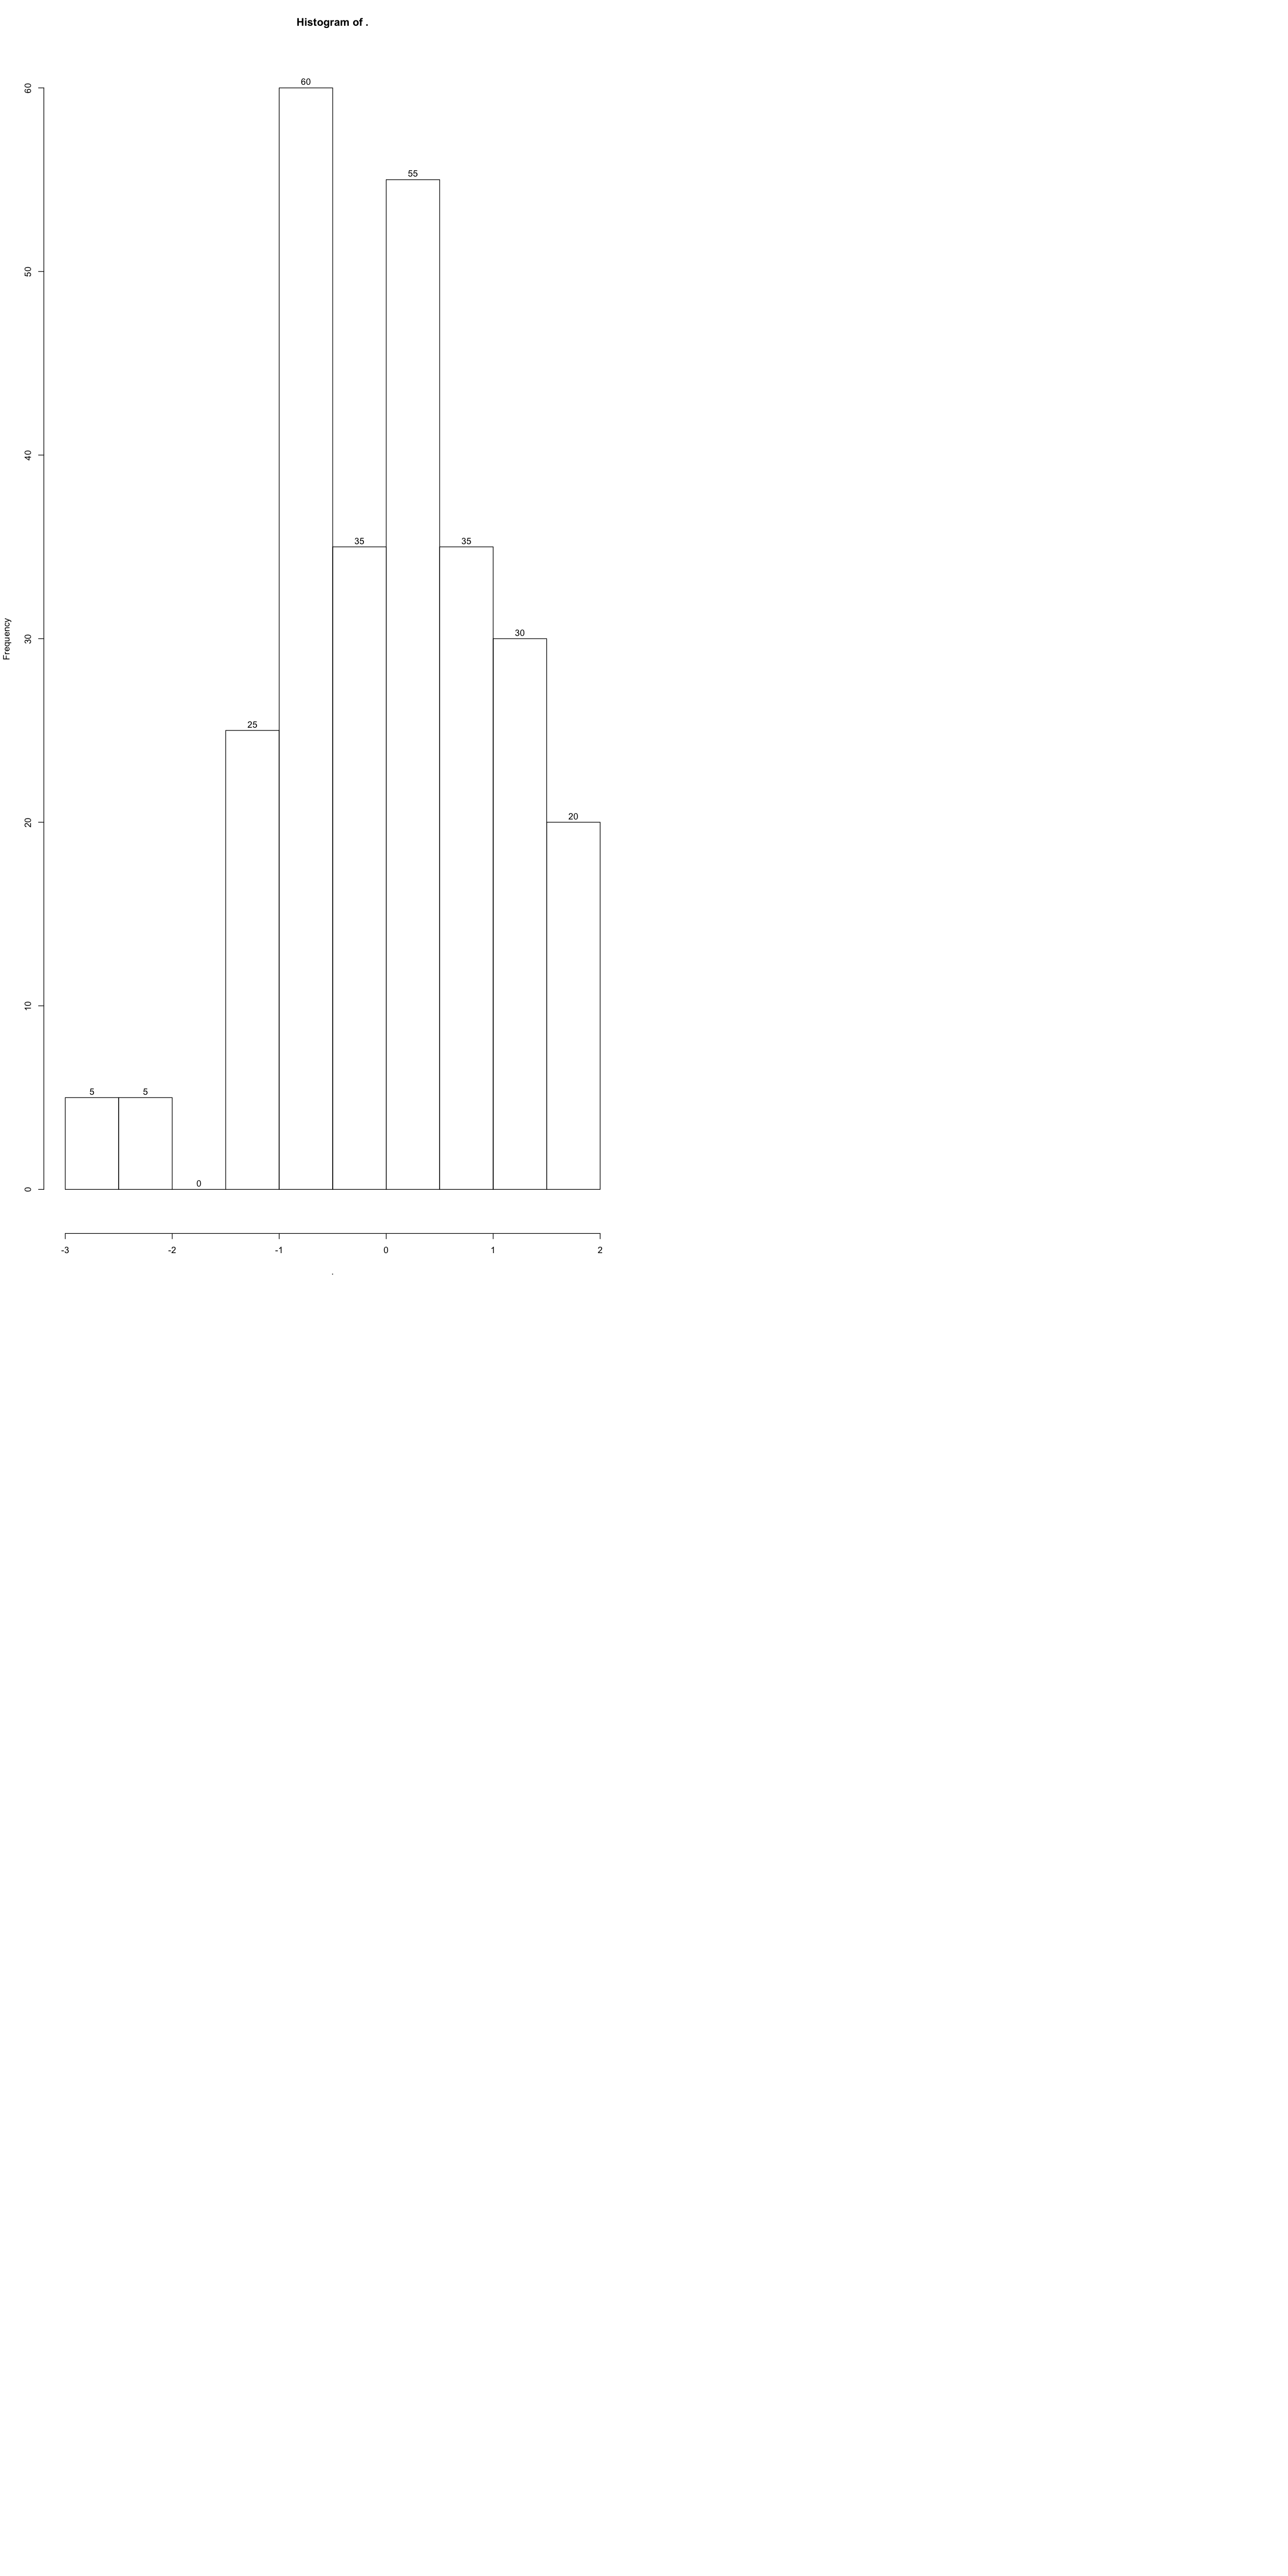

In [86]:
par(mfrow = c(2, 2))
plot(m12)
# infl <- influence(m12, obs = TRUE)

# infl
# cooks.distance(infl)
options(repr.plot.width=20, repr.plot.height=40);

plot(infl, which = "cook")
# cooks.distance(infl) >0.03

bmCC_le2$subjID[81:85]
scale(log(bmCC_le2$mt),scale=TRUE,center=TRUE)  %>% 
hist(labels = TRUE) #[81:85]

mean(log(bmCC_le2$mt)) - 1.4688*sd(log(bmCC_le2$mt))
# scale(log(bmCC_le2$mt),scale=TRUE,center=TRUE)>2

## 4c. Bootstrap 95% confidence intervals

In [27]:
suppressMessages(confint(m12, oldNames=FALSE, 
                         method = "boot",boot.type = "basic",nsim = 1000))


,2.5 %,97.5 %
sd_(Intercept)|CC_region:subjID,0.22056312,0.39418909
sigma,0.37073572,0.47803180
(Intercept),4.67489365,6.72242986
FA_val,-5.94228730,-2.57722310
log(chronicity),0.08103183,0.23550548
norm_ccVol,-0.31013561,-0.02998756
FA_val:CC_regioncc1,0.03569697,0.76526545
FA_val:CC_regioncc2,-0.15010626,0.51841951
FA_val:CC_regioncc4,0.11025877,0.85315202
FA_val:CC_regioncc5,0.37403029,1.29384377


## 4d. Lastly, let's look at pairwise contrasts of estimated marginal trends for each CC region

In [28]:
emtrends(m12,~CC_region,var="FA_val",infer=TRUE) %>% test() %>% 
mutate_if(is.numeric, round, 3)

suppressWarnings(emtrends(m12, "CC_region", var = "FA_val")) %>% pairs() %>% 
data.frame() %>% mutate_if(is.numeric, round, 3)


CC_region,FA_val.trend,SE,df,t.ratio,p.value
cc3,-4.201,0.846,138.182,-4.967,0
cc1,-3.822,0.771,137.254,-4.958,0
cc2,-4.034,0.812,137.221,-4.969,0
cc4,-3.748,0.755,137.778,-4.963,0
cc5,-3.377,0.682,136.842,-4.953,0


contrast,estimate,SE,df,t.ratio,p.value
cc3 - cc1,-0.379,0.182,144.561,-2.075,0.236
cc3 - cc2,-0.167,0.174,144.532,-0.957,0.874
cc3 - cc4,-0.453,0.188,143.531,-2.408,0.119
cc3 - cc5,-0.824,0.227,143.768,-3.636,0.003
cc1 - cc2,0.212,0.168,142.964,1.261,0.716
cc1 - cc4,-0.074,0.158,143.333,-0.468,0.990
cc1 - cc5,-0.445,0.174,142.448,-2.562,0.083
cc2 - cc4,-0.286,0.171,142.078,-1.672,0.455
cc2 - cc5,-0.657,0.201,141.495,-3.269,0.012
cc4 - cc5,-0.371,0.165,144.089,-2.251,0.167


## 4e. Diagnostics: Multicollinearity

In the above model, there is a strong correlation between FA of different CC regions, but this does not affect the model as shown by the VIF below

,GVIF,Df,GVIF^(1/(2*Df))
FA_val,2.875224,1,1.695649
log(chronicity),1.041392,1,1.020486
norm_ccVol,1.076879,1,1.037728
FA_val:CC_region,2.815502,4,1.138137


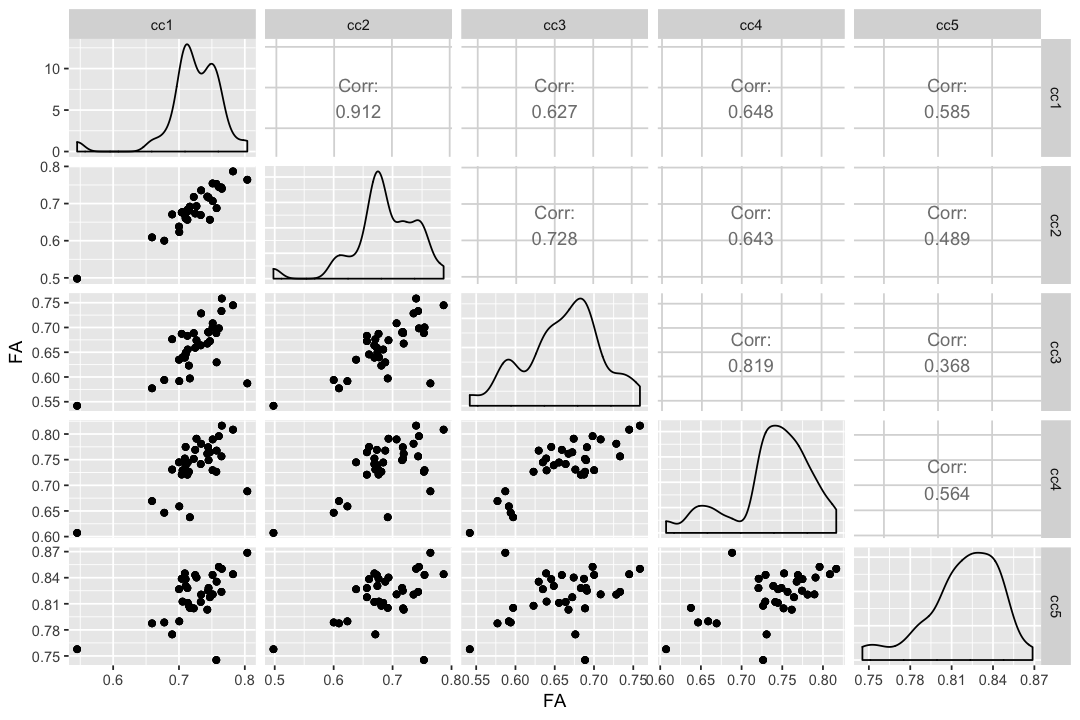

In [29]:
options(repr.plot.width=9, repr.plot.height=6);
ggpairs(bmCC[, c("cc1", "cc2", "cc3","cc4","cc5")]) + ylab("FA") + xlab("FA")   
display_markdown("In the above model, there is a strong correlation between FA of different CC regions, but this does not affect the model as shown by the VIF below")
vif(m12)


# 3b. Do traditional metrics of unilateral structural damage provided any additional explanatory power to the CC metrics-only model?
We answer this question by adding the following covariates one-by-one to our above FINAL model: (for definitions see Kim et al (2020) paper in review)

1. CST FA asymmetry index ("**cst_fa_ai**") <br>
2. CST lesion load ("**cst_ll**") <br>
3. Lesion volume ("**lesionVol**") <br>
4. Lesion FA ("**lesion_fa**") <br>
5. Lateral ventricular volume asymmetry index ("**ventr_ai**") <br>

In [30]:
up1 = suppressMessages(update(m12, . ~ . + cst_fa_ai))
up2 = suppressMessages(update(m12, . ~ . + cst_ll))
up3 = suppressMessages(update(m12, . ~ . + lesionVol))
up4 = suppressMessages(update(m12, . ~ . + lesion_fa))
up5 = suppressMessages(update(m12, . ~ . + ventr_ai))

class(up1) <- "lmerMod"
class(up2) <- "lmerMod"
class(up3) <- "lmerMod"
class(up4) <- "lmerMod"
class(up5) <- "lmerMod"

stargazer(up1,up2,up3,up4,up5,type = "text",
                   star.cutoffs = c(.05, .01, .001))



                                   Dependent variable:               
                    -------------------------------------------------
                                         log(mt)                     
                       (1)       (2)       (3)       (4)       (5)   
---------------------------------------------------------------------
FA_val              -4.426*** -5.124*** -3.650*** -4.163*** -4.814***
                     (0.860)   (0.832)   (0.931)   (0.844)   (0.813) 
                                                                     
log(chronicity)     0.180***  0.222***  0.164***  0.164***  0.178*** 
                     (0.044)   (0.042)   (0.041)   (0.042)   (0.040) 
                                                                     
norm_ccVol           -0.106    -0.087    -0.162*   -0.161*   -0.122  
                     (0.074)   (0.070)   (0.071)   (0.076)   (0.069) 
                                                                     
cst_fa_ai          

## Model comparisons with LR Test

In [31]:
up21 = suppressMessages(update(m12, . ~ . + ventr_ai + cst_ll + lesion_fa))
up22 = suppressMessages(update(m12, . ~ . + ventr_ai + lesion_fa))


class(up21) <- "lmerMod"

stargazer(up2,up5,up21,type = "text",
                   star.cutoffs = c(.05, .01, .001))


display_markdown("## * COMBINED model is significantly better than model with Ventr_AI alone")
lrtest(up5,up22)%>% mutate_if(is.numeric, round, 3)
suppressMessages(anova(up5,up21))%>% mutate_if(is.numeric, round, 3)

display_markdown("## * COMBINED model is also significantly better than model with Lesion_FA alone")
lrtest(up4,up22)%>% mutate_if(is.numeric, round, 3)
suppressMessages(anova(up2,up21))%>% mutate_if(is.numeric, round, 3)

display_markdown("## * COMBINED model is also significantly better than model with Lesion_FA alone")
lrtest(up2,up22)%>% mutate_if(is.numeric, round, 3)
suppressMessages(anova(up2,up21))%>% mutate_if(is.numeric, round, 3)

display_markdown("## * Model with all 3 slightly better than Ventr_AI + Lesion_FA")
lrtest(up21,up22)%>% mutate_if(is.numeric, round, 3)
suppressMessages(anova(up22,up21))%>% mutate_if(is.numeric, round, 3)



                          Dependent variable:      
                    -------------------------------
                                log(mt)            
                       (1)        (2)        (3)   
---------------------------------------------------
FA_val              -5.124***  -4.814***  -4.842***
                     (0.832)    (0.813)    (0.805) 
                                                   
log(chronicity)      0.222***   0.178***  0.185*** 
                     (0.042)    (0.040)    (0.041) 
                                                   
norm_ccVol            -0.087     -0.122    -0.171* 
                     (0.070)    (0.069)    (0.072) 
                                                   
cst_ll               0.025***               0.014  
                     (0.007)               (0.008) 
                                                   
lesion_fa                                 -1.413** 
                                           (0.499) 
           

## * COMBINED model is significantly better than model with Ventr_AI alone

#Df,LogLik,Df,Chisq,Pr(>Chisq)
11,-195.958,NA,NA,NA
12,-190.977,1,9.962,0.002


Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
11,391.470,430.637,-184.735,369.470,NA,NA,NA
13,381.685,427.974,-177.843,355.685,13.784,2,0.001


## * COMBINED model is also significantly better than model with Lesion_FA alone

#Df,LogLik,Df,Chisq,Pr(>Chisq)
11,-198.690,NA,NA,NA
12,-190.977,1,15.427,0


Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
11,389.872,429.039,-183.936,367.872,NA,NA,NA
13,381.685,427.974,-177.843,355.685,12.186,2,0.002


## * COMBINED model is also significantly better than model with Lesion_FA alone

#Df,LogLik,Df,Chisq,Pr(>Chisq)
11,-198.473,NA,NA,NA
12,-190.977,1,14.992,0


Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
11,389.872,429.039,-183.936,367.872,NA,NA,NA
13,381.685,427.974,-177.843,355.685,12.186,2,0.002


## * Model with all 3 slightly better than Ventr_AI + Lesion_FA

#Df,LogLik,Df,Chisq,Pr(>Chisq)
13,-193.204,NA,NA,NA
12,-190.977,-1,4.454,0.035


Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
12,383.301,426.029,-179.650,359.301,NA,NA,NA
13,381.685,427.974,-177.843,355.685,3.615,1,0.057



	Pearson's product-moment correlation

data:  bmCC$cst_ll and bmCC$ventr_ai
t = 6.6232, df = 114, p-value = 1.209e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3814823 0.6472486
sample estimates:
      cor 
0.5271363 


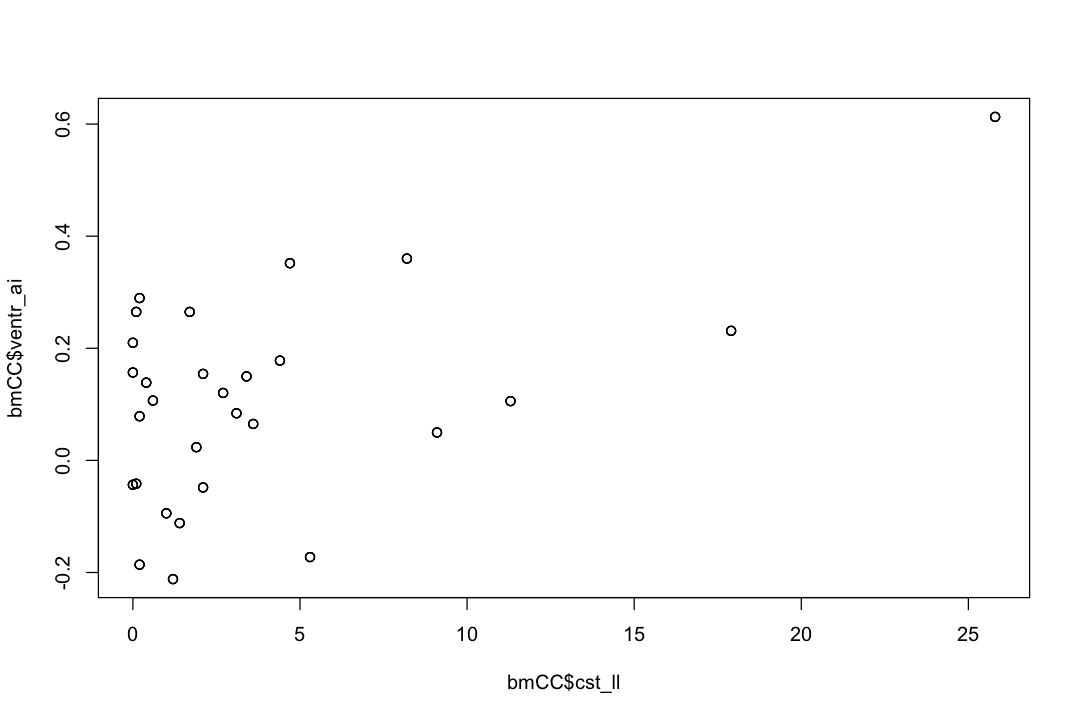

In [32]:
options(repr.plot.width=9, repr.plot.height=6);
# ggpairs(bmCC[, c("fullCC", "lesion_fa", "ventr_ai","cst_ll","cst_fa_ai")]) #ylab("FA") + xlab("FA")   

cor.test(bmCC$cst_ll,bmCC$ventr_ai,method="pearson")
plot(bmCC$cst_ll,bmCC$ventr_ai)

***
# What about those who use a unimanual strategy?


In [33]:
bmCCU = read.csv("1_stroke_bmCC_corr.csv")

# filtering out 
bmCCU  %>% 
filter(strat=="unimanual") %>% 
# select(-c(IpPrAvg,IpDistAvg,CoPrAvg)) %>% 
filter(taskC=="let") %>% 

{.->>bmCC_leU}

bmCC_leU %>% 
pivot_longer(cols = c("cc1","cc2","cc3","cc4","cc5"),"CC_region",values_to = "FA_val")%>% 
{.->> bmCC_leU2}

head(bmCC_leU2,10) %>% mutate_if(is.numeric, round, 3) 

# dim(bmCC_leU2)

subjID,sol,sex,age,taskC,task,strat,mt,chronicity,lesionVol,⋯,cst_ll,ventr_ai,lesion_fa,IpPrAvg,IpDistAvg,CoPrAvg,CoDistAvg,norm_ccVol,CC_region,FA_val
dose_2010,RHD,female,31,let,le,unimanual,38.572,4.760,107.05,⋯,NA,NA,NA,0.934,4.362,1.689,25.328,3.303,cc1,0.751
dose_2010,RHD,female,31,let,le,unimanual,38.572,4.760,107.05,⋯,NA,NA,NA,0.934,4.362,1.689,25.328,3.303,cc2,0.754
dose_2010,RHD,female,31,let,le,unimanual,38.572,4.760,107.05,⋯,NA,NA,NA,0.934,4.362,1.689,25.328,3.303,cc3,0.700
dose_2010,RHD,female,31,let,le,unimanual,38.572,4.760,107.05,⋯,NA,NA,NA,0.934,4.362,1.689,25.328,3.303,cc4,0.729
dose_2010,RHD,female,31,let,le,unimanual,38.572,4.760,107.05,⋯,NA,NA,NA,0.934,4.362,1.689,25.328,3.303,cc5,0.843
dose_2016,LHD,female,56,let,le,unimanual,5.339,2.101,5.94,⋯,3.6,0.065,0.179,0.650,2.825,0.680,3.918,2.926,cc1,0.700
dose_2016,LHD,female,56,let,le,unimanual,5.339,2.101,5.94,⋯,3.6,0.065,0.179,0.650,2.825,0.680,3.918,2.926,cc2,0.638
dose_2016,LHD,female,56,let,le,unimanual,5.339,2.101,5.94,⋯,3.6,0.065,0.179,0.650,2.825,0.680,3.918,2.926,cc3,0.635
dose_2016,LHD,female,56,let,le,unimanual,5.339,2.101,5.94,⋯,3.6,0.065,0.179,0.650,2.825,0.680,3.918,2.926,cc4,0.745
dose_2016,LHD,female,56,let,le,unimanual,5.339,2.101,5.94,⋯,3.6,0.065,0.179,0.650,2.825,0.680,3.918,2.926,cc5,0.827


In [34]:
display_markdown("**Original default contrasts**")
contrasts(factor(bmCC_leU2$CC_region))

display_markdown("**Re-leveled contrasts to make motor CC as reference**")
bmCC_leU2$CC_region = relevel(factor(bmCC_leU2$CC_region), ref = "cc3")
contrasts(factor(bmCC_leU2$CC_region))


**Original default contrasts**

,cc2,cc3,cc4,cc5
cc1,0,0,0,0
cc2,1,0,0,0
cc3,0,1,0,0
cc4,0,0,1,0
cc5,0,0,0,1


**Re-leveled contrasts to make motor CC as reference**

,cc1,cc2,cc4,cc5
cc3,0,0,0,0
cc1,1,0,0,0
cc2,0,1,0,0
cc4,0,0,1,0
cc5,0,0,0,1


In [35]:
m12U = suppressMessages(lmer(log(mt) ~ FA_val + FA_val:CC_region + log(chronicity) + sex + norm_ccVol + 
                                     (1|CC_region:subjID), data = bmCC_leU2,
                       control = lmerControl(optimizer ="Nelder_Mead")))

class(m12U) <- "lmerMod"

dvNames0 = c('Mean FA','log(Chronicity)','Total Normalized CC Volume',
            'FA: CC2','FA: CC3','FA: CC4','FA: CC5','Intercept')

stargazer(m12U,type = "text",
          star.char = c("*", "**","***"),
          star.cutoffs = c(.05, .01, .001),
          digit.separator = "",single.row=TRUE,
          dep.var.labels = c('Unimanual MT'),
#           covariate.labels = dvNames0,
          title = "Brain-Behavior Relationship")

# Plot regression
options(repr.plot.width=6.5, repr.plot.height=5)

new_cols <- c("#C874AE", "#19264E", "#7384CB", "#C2D9F5", "#B8BA2F")

fitted = visreg(m12U, xvar = "FA_val", by = "CC_region",
                strip.names = FALSE, 
                points=list(size=2,alpha = 0.4),line=list(size=2.5),
                overlay = TRUE, gg = TRUE)

display_markdown("## <br> 4b.2 Model-adjusted fits & predicted values")
Um = suppressMessages(fitted + scale_color_manual(values = new_cols,name = "Region",
                                             labels = c("cc1", "cc2","cc3","cc4","cc5")) + 
                           coord_cartesian(xlim = c(0.5,0.9),ylim=c(1.5,4),expand = -0.01) + 
                           labs(x = "Mean FA", y = "unimanual MT\n(log-s)") +                          
                           guides(fill=FALSE) + setFigThm + theme(legend.position="right",
                                                                  plot.margin = unit(c(0.1,0.1,0.25,0.25), "cm")))




Brain-Behavior Relationship
                         Dependent variable:     
                    -----------------------------
                            Unimanual MT         
-------------------------------------------------
FA_val                     7.834** (2.793)       
log(chronicity)            0.297** (0.103)       
sexmale                   -0.773*** (0.202)      
norm_ccVol                 -0.088 (0.215)        
FA_val:CC_regioncc1        -0.525 (0.389)        
FA_val:CC_regioncc2        -0.212 (0.359)        
FA_val:CC_regioncc4        -0.722 (0.423)        
FA_val:CC_regioncc5        -1.300* (0.563)       
Constant                   -2.363 (1.936)        
-------------------------------------------------
Observations                     60              
Log Likelihood                 -46.668           
Akaike Inf. Crit.              115.336           
Bayesian Inf. Crit.            138.373           
Note:               *p<0.05; **p<0.01; ***p<0.001


## <br> 4b.2 Model-adjusted fits & predicted values

In [36]:
emtrends(m12U,~CC_region,var="FA_val",infer=TRUE) %>% test() %>% 
mutate_if(is.numeric, round, 3)

suppressWarnings(emtrends(m12U, "CC_region", var = "FA_val")) %>% pairs() %>% 
data.frame() %>% mutate_if(is.numeric, round, 3)



CC_region,FA_val.trend,SE,df,t.ratio,p.value
cc3,7.834,2.794,42.318,2.803,0.008
cc1,7.309,2.612,42.375,2.798,0.008
cc2,7.621,2.719,42.080,2.803,0.008
cc4,7.112,2.541,42.525,2.799,0.008
cc5,6.534,2.334,42.382,2.800,0.008


contrast,estimate,SE,df,t.ratio,p.value
cc3 - cc1,0.525,0.390,40.817,1.346,0.665
cc3 - cc2,0.212,0.359,40.942,0.591,0.976
cc3 - cc4,0.722,0.424,40.521,1.704,0.443
cc3 - cc5,1.300,0.564,41.542,2.304,0.164
cc1 - cc2,-0.312,0.356,39.977,-0.876,0.904
cc1 - cc4,0.197,0.336,40.559,0.587,0.976
cc1 - cc5,0.775,0.420,41.389,1.845,0.362
cc2 - cc4,0.509,0.379,39.469,1.342,0.667
cc2 - cc5,1.087,0.502,40.333,2.167,0.213
cc4 - cc5,0.578,0.373,41.801,1.548,0.538


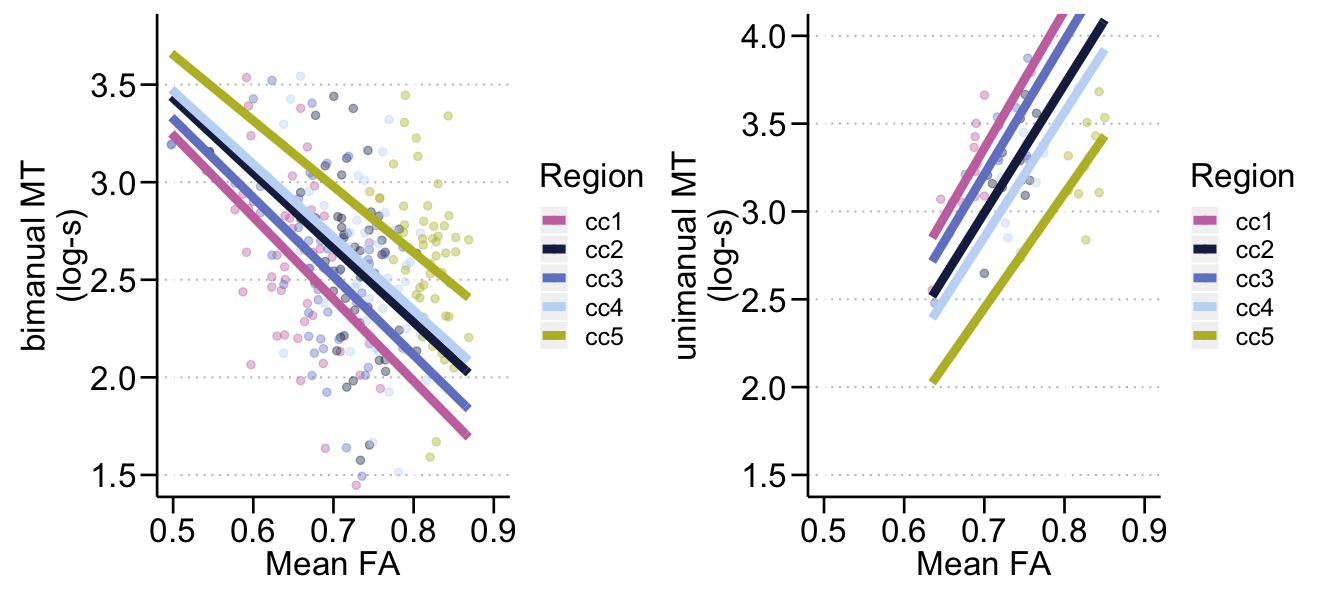

In [37]:
options(repr.plot.width=11, repr.plot.height=5)

Bm | Um

***
# Analysis 2: Comparing CC microstructure between chronic stroke survivors and neurologically intact adults


## 1. Import & Reorganize Data

In [38]:
ccGrps = read.csv("2_threeGrp_CC.csv")
ccGrps$grp = factor(ccGrps$grp, levels=c('younger','older','stroke'))

tail(ccGrps,5) %>% mutate_if(is.numeric, round, 3)

ccGrps  %>% 
pivot_longer(cols = c("cc1","cc2","cc3","cc4","cc5"),"CC_region",values_to = "FA_val")%>% 
{.->>ccGrps2}

ccGrps2$grp = factor(ccGrps2$grp, levels=c('younger','older','stroke'))

tail(ccGrps2,10) %>% mutate_if(is.numeric, round, 3)

mean(ccGrps$cc2[ccGrps$grp=="stroke"])
ccGrps %>% 
filter(subjID=="dose_2037") %>% 
select(cc5)


subjID,grp,scanner,sex,age,cc1,cc2,cc3,cc4,cc5,fullCC,sol
dose_2037,stroke,hsc,male,80,0.690,0.671,0.676,0.731,0.775,0.712,LHD
dose_2038,stroke,hsc,male,60,0.705,0.621,0.589,0.651,0.790,0.692,RHD
dose_2039,stroke,hsc,male,69,0.720,0.648,0.655,0.768,0.830,0.729,RHD
dose_2040,stroke,hsc,male,72,0.745,0.730,0.728,0.770,0.833,0.767,RHD
dose_2041,stroke,hsc,female,55,0.761,0.745,0.698,0.796,0.852,0.776,LHD


subjID,grp,scanner,sex,age,fullCC,sol,CC_region,FA_val
dose_2040,stroke,hsc,male,72,0.767,RHD,cc1,0.745
dose_2040,stroke,hsc,male,72,0.767,RHD,cc2,0.730
dose_2040,stroke,hsc,male,72,0.767,RHD,cc3,0.728
dose_2040,stroke,hsc,male,72,0.767,RHD,cc4,0.770
dose_2040,stroke,hsc,male,72,0.767,RHD,cc5,0.833
dose_2041,stroke,hsc,female,55,0.776,LHD,cc1,0.761
dose_2041,stroke,hsc,female,55,0.776,LHD,cc2,0.745
dose_2041,stroke,hsc,female,55,0.776,LHD,cc3,0.698
dose_2041,stroke,hsc,female,55,0.776,LHD,cc4,0.796
dose_2041,stroke,hsc,female,55,0.776,LHD,cc5,0.852


[1] 0.6865702

cc5
0.774801


## 2. Plot

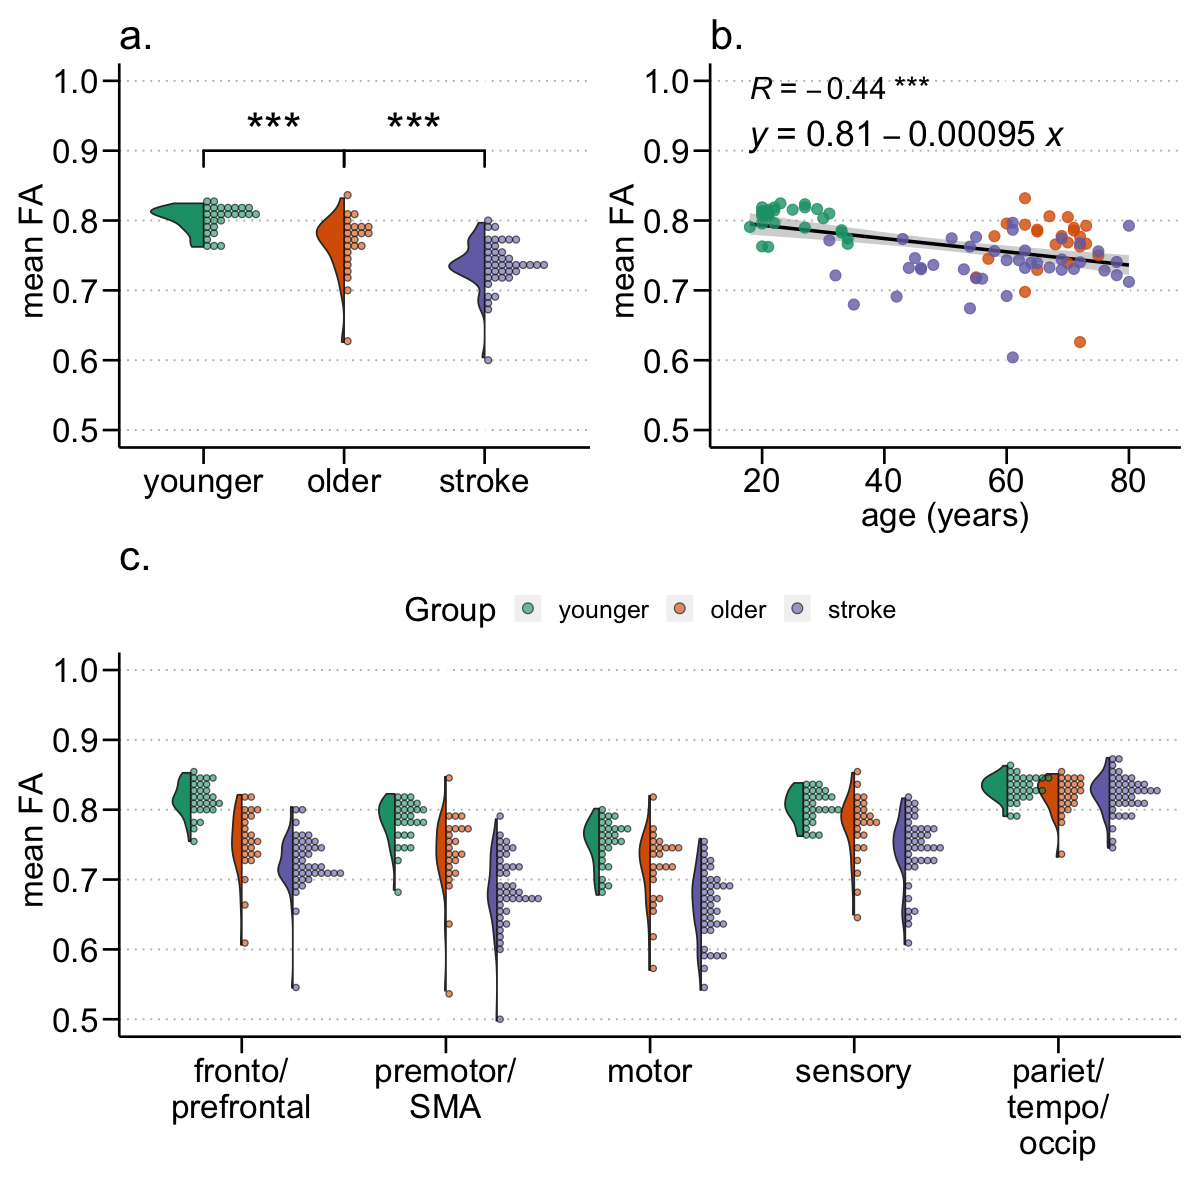

In [39]:
options(repr.plot.width=10, repr.plot.height=10)

my_comparisons <- list(c("younger","older"),c("older","stroke"))
reg <- c("fronto/\nprefrontal","premotor/\nSMA",'motor','sensory','pariet/\ntempo/\noccip')
gr <- c("younger", "older","stroke")


Fig1A = ggplot(ccGrps, aes(x = grp, y = fullCC, fill = grp)) +
          geom_half_violin(alpha = 1,show.legend = FALSE) + 
          geom_half_dotplot(binwidth = 1/110, dotsize = 1.1, alpha = 0.6, method = "histodot", show.legend = FALSE) +
          scale_fill_brewer(palette = "Dark2") + scale_color_brewer(palette = "Dark2") + 
          stat_compare_means(comparisons = my_comparisons, label = "p.signif",bracket.size = 0.75,
                             tip.length = 0.1, size = 10, label.y = 0.9,label.x = 0.5,
                             symnum.args=list(cutpoints = c(0, 0.001, 0.01, 0.05, 1), 
                                              symbols = c("***", "**", "*", "ns"))) + 
          coord_cartesian(ylim = c(0.5,1),expand = -0.5) + 
          xlab("") + ylab(" mean FA") + ggtitle("a. ") + 
          scale_x_discrete(labels= gr) + setFigThm


Fig1B = ggplot(ccGrps, aes(x = age,y = fullCC)) +
        geom_smooth(alpha = 0.5,fill = "darkgray",col = "black", method="lm",show.legend = FALSE) + 
        geom_point(aes(col = grp),size=2.75,alpha = 0.8, show.legend = FALSE) +

        stat_cor(aes(label = paste(..r.label.., cut(..p.., breaks = c(-Inf, 0.0001, 0.001, 0.01, 0.05, Inf),
                                        labels = c("'***'", "'***'", "'**'", "'*'", "'ns'")), sep = "~")),
                                        label.y = 0.99, size = 6.5) + 
        stat_regline_equation(label.y = 0.92, size=7.5) + 

          scale_fill_brewer(palette = "Dark2",name = "Group", labels = c("younger","older","stroke")) + 
          scale_color_brewer(palette = "Dark2",name = "Group", labels = c("younger", "older","stroke")) + 
        coord_cartesian(xlim = c(15,85),ylim = c(0.5,1),expand=-0.5) +
        xlab("age (years)") + ylab(" mean FA") + ggtitle("b. ") +  
        theme_classic2() + setFigThm



Fig1C = ggplot(ccGrps2, aes(x = CC_region, y = FA_val, fill = grp)) +
          geom_half_violin(alpha = 1,show.legend = FALSE) + 
          geom_half_dotplot(binwidth = 1/110, alpha = 0.6, method = "histodot", show.legend = TRUE) +
          scale_fill_brewer(palette = "Dark2",name = "Group", labels = gr) + 
          scale_color_brewer(palette = "Dark2",name = "Group", labels = gr) + 
          coord_cartesian(ylim = c(0.5,1),expand = -0.5) +
          xlab("") + ylab(" mean FA") + ggtitle("c. ") + 
          scale_x_discrete(labels= reg) + setFigThm + 
          theme(plot.margin = margin(0,0,0,0, "pt"))


Fig1 = (Fig1A | Fig1B)/ Fig1C
Fig1
# tiff("Fig1_bmCC.tiff", units="in", width=10, height=10, res=800); Fig1; dev.off()
# Fig1B

## 3a. Mixed Effects Linear Model
* The form of the model to test our hypothesis regarding group differences is pretty staightforward (FA ~ Grp), and with expected intercept differences between different CC regions, we will also model CC region as a fixed factor that interacts with Grp. 
* Of course, regions are not independently sampled, but rather repeatedly sampled from within a subject. So, we use a subject-wise random effect to estimate the variance in the intercept for each subject (i.e., random interept for subject). <br>
* An important question for us is concerning the ***scanner-related variances***. Our data are pooled from two different scanners-- the older and younger controls were scanned at the UPC campuss (Seimens Trio) and the stroke survivors were scanned at HSC campus (GE Signa).<br>
* So, how do we model the random effect for scanner? Here is a helpful resource that I found on the subject of modeling categorical variabless as random slope or random intercept: https://stat.ethz.ch/pipermail/r-sig-mixed-models/2009q1/001736.html
* Basically, because there is partial overlap in the "scanner" and "grp" variable, modeling this rather similar factor as both a fixed effect (estimated by least-squares as intercept differences) as well as random intercept is redundant.
* Instead, we can try to estimate variance as slope which differs between subjects. But this means an added parameter (var-covar) will need to be estimated. We try a few different variations suggested in the above reference link.<br>

### p1) Mean FA ~ Group + CC region + Group x CC region + <font color = 'green'> (1 | Subject) + (1 | Scanner : Subject) </font> 
### p2) Mean FA ~ Group + CC region + Group x CC region + <font color = 'orangered'> (1 | Scanner : Subject)</font> 
### p3) Mean FA ~ Group + CC region + Group x CC region + <font color = 'orangered'> (1 + Scanner | Subject)</font> 

None of the models are different from each other, so we go with **p1**, in which only a moderate number of parameters are estimated (not too complex). p3 for example estimated variance-covariance for the slope related to scanner and the subject-wise intercept, so we avoid that... even though it seems like a slightly better fit with lower AIC/BIC (possibly due to overfitting). 
Anyway, p1 model nicely captures the subject-wise and scanner-specific subject-wise variances.

Warning message in tidy.anova(.):
“The following column names in ANOVA output were not recognized or transformed: NumDF, DenDF”

term,sumsq,meansq,NumDF,DenDF,statistic,p.value
grp,0.035,0.018,2,89.998,31.613,0
CC_region,0.651,0.163,4,360.001,292.211,0
grp:CC_region,0.094,0.012,8,360.001,21.011,0



Group Differences
                                       Dependent variable:                 
                      -----------------------------------------------------
                                             Mean FA                       
                         *p1-FINAL*            p2                p3        
                             (1)               (2)               (3)       
---------------------------------------------------------------------------
Younger               0.062*** (0.012)  0.062*** (0.012)  0.062*** (0.011) 
Stroke                -0.029** (0.011)  -0.029** (0.011)  -0.029** (0.011) 
CC2 Premotor/SMA       -0.017* (0.007)   -0.017* (0.007)   -0.017* (0.007) 
CC3 Motor             -0.037*** (0.007) -0.037*** (0.007) -0.037*** (0.007)
CC4 Sensory            0.022** (0.007)   0.022** (0.007)   0.022** (0.007) 
CC5 Pariet/Temp/Occip 0.067*** (0.007)  0.067*** (0.007)  0.067*** (0.007) 
CC2 : Younger          -0.015 (0.009)    -0.015 (0.009)    -0.015 (0.

refitting model(s) with ML (instead of REML)


Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
17,-1919.205,-1848.790,976.603,-1953.205,NA,NA,NA
18,-1917.205,-1842.648,976.603,-1953.205,0.000,1,1.000
19,-1916.108,-1837.409,977.054,-1954.108,0.903,1,0.342


#Df,LogLik,Df,Chisq,Pr(>Chisq)
18,912.162,NA,NA,NA
17,912.162,-1,0.000,1.000
19,912.555,2,0.786,0.675


## <br> 3b. Plot showing model fits and predicted values

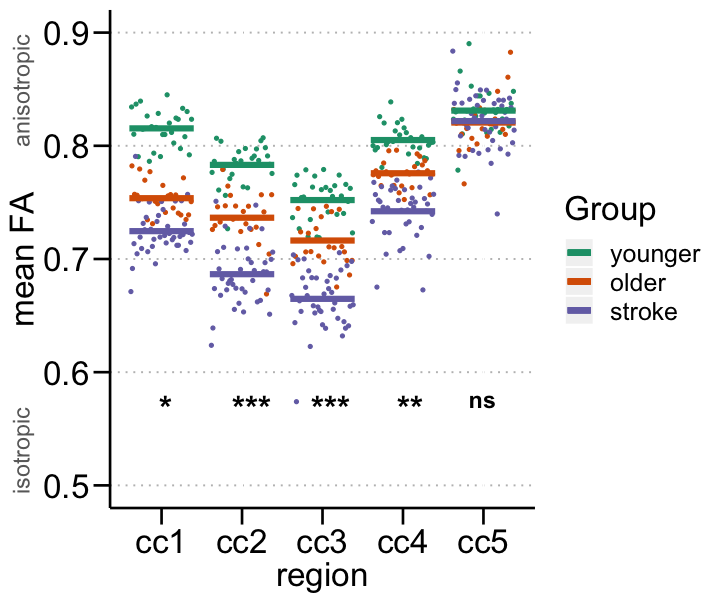

In [49]:
ccGrps2$grp = relevel(ccGrps2$grp, ref = "older")

# sex was not found to be significant so not included in model below
p1 = suppressWarnings(lmer(FA_val ~  grp * CC_region + (1 | subjID) + (1|scanner:subjID), data = ccGrps2))

p2 = suppressWarnings(lmer(FA_val ~  grp * CC_region + (1 | scanner : subjID), data = ccGrps2))
p3 = suppressWarnings(lmer(FA_val ~  grp * CC_region + (1 + scanner | subjID), data = ccGrps2))


# uncomment below to see new contrasts; reference 'grp' = older = 0 & 'sex' = female = 0 
# contrasts(ccGrps2$grp)
# contrasts(ccGrps2$sex)
anova(p1) %>%  tidy() %>% mutate_if(is.numeric, round, 3)
dvNames = c('Younger','Stroke','CC2 Premotor/SMA','CC3 Motor','CC4 Sensory','CC5 Pariet/Temp/Occip',
            'CC2 : Younger','CC2 : Stroke','CC3 : Younger','CC3 : Stroke',
            'CC4 : Younger','CC4 : Stroke','CC5 : Younger','CC5 : Stroke',
            'Intercept')

class(p1) <- "lmerMod"
class(p2) <- "lmerMod"
class(p3) <- "lmerMod"


stargazer(c(p1,p2,p3), type = "text",
          digits = 3,
          star.cutoffs = c(0.05, 0.01, 0.001),
          digit.separator = "",single.row=TRUE,
          dep.var.labels = c('Mean FA'),
          covariate.labels = dvNames,
          column.labels = c("*p1-FINAL*","p2","p3"),
          title = "Group Differences")

# comparing the 3 models
suppressWarnings(anova(p1,p2,p3))%>% mutate_if(is.numeric, round, 3)
lrtest(p1,p2,p3)%>% mutate_if(is.numeric, round, 3)

# Plot regression fits and predicted values
options(repr.plot.width=6, repr.plot.height=5)

# but first, remember to change reference groups ONLY for plotting
# stupid theme colors--have to be in order!
ccGrps2$grp = relevel(ccGrps2$grp, ref = "younger")

fitted = visreg(p1, xvar = "CC_region", by = "grp", strip.names = FALSE,line=list(size=1.75),
                overlay = TRUE, xlab = "region",ylab = "mean FA", gg = TRUE)
display_markdown("## <br> 3b. Plot showing model fits and predicted values")
suppressMessages(fitted + scale_color_brewer(palette = "Dark2",name = "Group",labels = c("younger", "older","stroke")) + 
                           coord_cartesian(ylim = c(0.5,0.9),expand = -0.5) +
                           guides(fill=FALSE) + setFigThm + theme(legend.position="right"))

grid.text("***", x = unit(c(0.46), "npc"), y = unit(c(0.32), "npc"),#rot = 90,
           gp = gpar(fontsize = 20, fontface = "bold",col = "black"))
grid.text("***", x = unit(c(0.35), "npc"), y = unit(c(0.32), "npc"),
           gp = gpar(fontsize = 20, fontface = "bold",col = "black"))
grid.text("**", x = unit(c(0.57), "npc"), y = unit(c(0.32), "npc"),
           gp = gpar(fontsize = 20, fontface = "bold",col = "black"))
grid.text("*", x = unit(c(0.23), "npc"), y = unit(c(0.32), "npc"),
           gp = gpar(fontsize = 20, fontface = "bold",col = "black"))
grid.text("ns", x = unit(c(0.67), "npc"), y = unit(c(0.335), "npc"),
           gp = gpar(fontsize = 14,fontface = "bold",col = "black"))

grid.text("isotropic", x = unit(c(0.03), "npc"), y = unit(c(0.25), "npc"), rot = 90,
           gp = gpar(fontsize = 14, col = "dimgray"))
grid.text("anisotropic", x = unit(c(0.03), "npc"), y = unit(c(0.85), "npc"), rot = 90,
           gp = gpar(fontsize = 14,col = "dimgray"))


## 3c. Testing for confounding effects of age and sex
Neither were found to meet our criterion of p=0.1

In [41]:
# relevel back to original model so we can run updates and post-hoc comparisons of ourr model
ccGrps2$grp = relevel(ccGrps2$grp, ref = "older")

mp1 = suppressWarnings(update(p1, . ~ . + age))
mp2 = suppressWarnings(update(p1, . ~ . + sex))
class(mp1) <- "lmerMod"
class(mp2) <- "lmerMod"

stargazer(mp1,mp2,type = "text",
          star.char = c("*", "**","***"),
          star.cutoffs = c(.1, .01, .001))


                             Dependent variable:     
                        -----------------------------
                                   FA_val            
                             (1)            (2)      
-----------------------------------------------------
grpyounger                 0.075***       0.062***   
                           (0.020)        (0.012)    
                                                     
grpstroke                  -0.027*        -0.029**   
                           (0.011)        (0.011)    
                                                     
CC_regioncc2               -0.017*        -0.017*    
                           (0.007)        (0.007)    
                                                     
CC_regioncc3              -0.037***      -0.037***   
                           (0.007)        (0.007)    
                                                     
CC_regioncc4               0.022**        0.022**    
                           

## 3d. Bootstrap 95% confidence intervals of p1 (final model)

In [42]:
# bootstrap to get confidence intervales (R = 1000)
suppressMessages(confint(p1, oldNames=FALSE,
                         method = "boot",boot.type = "basic",nsim = 1000))


,2.5 %,97.5 %
sd_(Intercept)|subjID,0.022004960,0.034864213
sd_(Intercept)|scanner:subjID,0.002457670,0.026625637
sigma,0.021891674,0.025194681
(Intercept),0.737966557,0.770242755
grpyounger,0.038535728,0.084050510
grpstroke,-0.050219462,-0.008849926
CC_regioncc2,-0.029330236,-0.003579553
CC_regioncc3,-0.051387737,-0.024594231
CC_regioncc4,0.008530621,0.035415056
CC_regioncc5,0.052270156,0.080063827


## 3e. Lastly, let's have a look at pairwise comparisons of estimated marginal means from our final mixed model p1
Note that here we are only interested in comparing the groups for each region of the CC.

In [43]:
emmeans(p1, specs = pairwise ~ grp|CC_region,lmer.df = "satterthwaite")$contrasts %>% 
data.frame() %>% mutate_if(is.numeric, round, 3)


contrast,CC_region,estimate,SE,df,t.ratio,p.value
older - younger,cc1,-0.062,0.012,159.287,-5.350,0.000
older - stroke,cc1,0.029,0.011,159.287,2.734,0.019
younger - stroke,cc1,0.091,0.010,159.287,8.937,0.000
older - younger,cc2,-0.047,0.012,159.287,-4.048,0.000
older - stroke,cc2,0.050,0.011,159.287,4.685,0.000
younger - stroke,cc2,0.097,0.010,159.287,9.505,0.000
older - younger,cc3,-0.036,0.012,159.287,-3.101,0.006
older - stroke,cc3,0.052,0.011,159.287,4.838,0.000
younger - stroke,cc3,0.087,0.010,159.287,8.590,0.000
older - younger,cc4,-0.029,0.012,159.287,-2.544,0.032


***
#                                     —END OF MAIN ANALYSES—
***


# *Supplementary Analyses* 
## A) Validating subject space CC mask with native space masks (gold standard)

In [44]:
manSeg = read.csv("Supp_manualSeg_fullCC.csv")

head(manSeg,5)

manSeg[,1:3]  %>% 
pivot_longer(cols = c("nat_FA","std_FA"))  %>% 
{.->> valData2}

colnames(valData2)[2] <- "space"
colnames(valData2)[3] <- "FA"

ID,nat_FA,std_FA,diff,perc_diff
dose_2003,0.595560,0.577092,-0.018468,-1.8468
dose_2005,0.602765,0.602641,-0.000124,-0.0124
dose_2007,0.595451,0.588455,-0.006996,-0.6996
dose_2008,0.601262,0.601249,-0.000013,-0.0013
dose_2009,0.627244,0.637230,0.009986,0.9986


In [45]:
set.seed(1315)

R      <- 1000

t.vect <- vector(length=R)
p.vect <- vector(length=R)
ciu.vect <- vector(length=R)
cil.vect <- vector(length=R)


for(i in 1:R){
  boot.ctr <- sample(manSeg$nat_FA, size=20, replace=T)
  boot.exp <- sample(manSeg$std_FA, size=20, replace=T)
  ttest  <- t.test(boot.ctr, boot.exp)
  t.vect[i] <- ttest$statistic
  p.vect[i] <- ttest$p.value
  ciu.vect[i] <- ttest$conf.int[2]
  cil.vect[i] <- ttest$conf.int[1]

}

t.dist = rt(1000,38,0)


newDat = data.frame(t.vect,t.dist)
newDat  %>% 
pivot_longer(cols = c("t.vect","t.dist"))  %>%          
{.->> newDat2}
colnames(newDat2)[2] <- "t_val"



Warning message:
“The plyr::rename operation has created duplicates for the following name(s): (`size`)”notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.


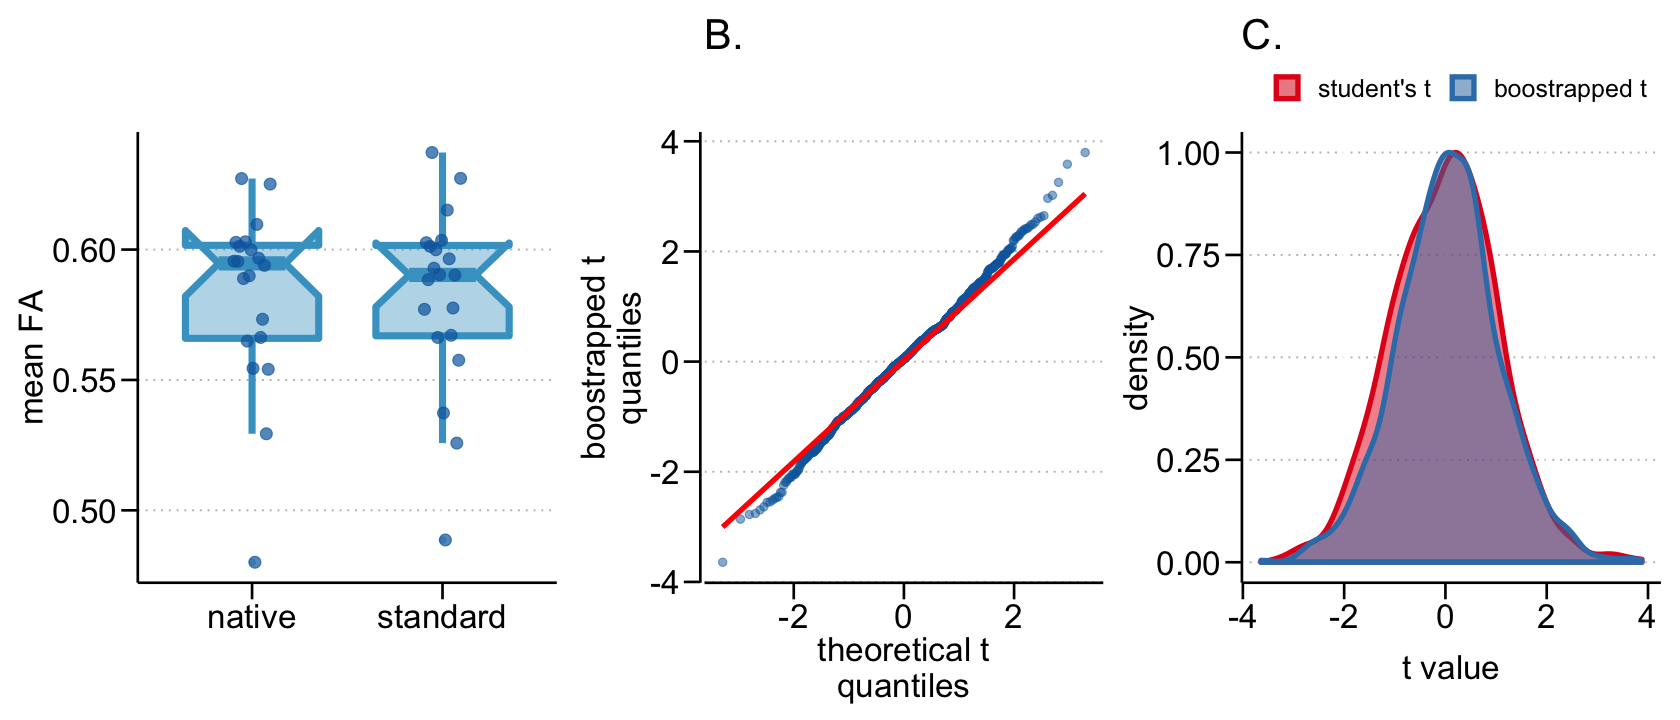

In [46]:
options(repr.plot.width=14, repr.plot.height=6)

g0 = ggplot(aes(y = FA, x = space),data = valData2)  + 

# geom_line(aes(y = FA, x = space,group=ID),#col="#43a2ca",
#           position = position_dodge2(0.2),size=0.5) + ggtitle("A. ") + 

geom_boxplot(size = 2,notch = T,alpha=0.4, width = 0.7,fill ="#43a2ca", col="#43a2ca", 
                 position=position_dodge(0.6),
                 show.legend = FALSE,size=0.5) + xlab("") + 
geom_point(alpha = 0.7, col="#0868ac",
           position = position_dodge2(0.2), show.legend = FALSE,size=3) +
    xlab("") + ylab("mean FA")+ scale_x_discrete(labels= c("native",'standard')) + 

theme_classic2() + setFigThm

gl1 = ggplot(newDat, aes(sample = t.vect)) +
  stat_qq(col="#0868ac",size=2,alpha=0.5) +
  stat_qq_line(col="Red",size=1.5) + 
theme_bw() + coord_fixed(ratio = 1)+ ggtitle("B. ") + 
ylab("boostrapped t\nquantiles") + xlab("theoretical t\nquantiles") +  
setFigThm 

gl2 = ggplot(newDat2, aes(x=t_val)) + 
geom_density(aes(y=..scaled..,group=name, colour=name, fill=name),
                 alpha=0.5,show.legend = TRUE,size=1.5) + ggtitle("C. ") + 
theme_minimal() + setFigThm +
# coord_fixed(xlim = c(0,1),ratio = 1,expand = TRUE,  clip = "on") + 

scale_fill_brewer(palette = "Set1",name = "", labels = c("student's t", "boostrapped t")) + 
scale_color_brewer(palette = "Set1",name = "", labels = c("student's t", "boostrapped t")) + 
coord_cartesian(ylim = c(0,1)) + setFigThm + 

xlab("t value") + ylab("density")



g0  | gl1 | gl2

In [47]:
# Session INFO
sessionInfo()


R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.15.7

Matrix products: default
BLAS/LAPACK: /Users/rinivarghese/anaconda3/lib/R/lib/libRblas.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] visreg_2.7.0    purrr_0.3.3     lmtest_0.9-37   zoo_1.8-8      
 [5] table1_1.2      stargazer_5.2.2 tidyr_1.1.0     dplyr_0.8.3    
 [9] emmeans_1.5.4   ggExtra_0.8     broom_0.5.6     boot_1.3-20    
[13] huxtable_4.3.0  car_3.0-10      carData_3.0-1   rstatix_0.6.0  
[17] lmerTest_3.1-3  MASS_7.3-50     lme4_1.1-21     Matrix_1.2-18  
[21] patchwork_1.0.0 gghalves_0.1.0  ggpubr_0.2.4    magrittr_1.5   
[25] GGally_1.4.0    psych_1.8.10    IRdisplay_0.7.0 ggplot2_3.0.0  
[29] repr_0.19.2    

loaded via a namespace (and not attached):
 [1] nlme_3.1-137       pbkrtest_0.5-0.1

*** 
UNIMANUAL
***

In [48]:
# head(bmCC_le2)
summary(lmer(log(IpDistAvg+1)~FA_val+FA_val:CC_region +(1|CC_region:subjID),data=bmCC_le2))

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model is nearly unidentifiable: very large eigenvalue
 - Rescale variables?”Warning message:
“Model failed to converge with 1 negative eigenvalue: -1.8e-08”

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
log(IpDistAvg + 1) ~ FA_val + FA_val:CC_region + (1 | CC_region:subjID)
   Data: bmCC_le2

REML criterion at convergence: -3138.3

Scaled residuals: 
       Min         1Q     Median         3Q        Max 
-1.993e-06 -8.163e-07 -3.085e-07  1.060e-06  3.529e-06 

Random effects:
 Groups           Name        Variance  Std.Dev. 
 CC_region:subjID (Intercept) 2.765e-02 1.663e-01
 Residual                     9.667e-14 3.109e-07
Number of obs: 270, groups:  CC_region:subjID, 155

Fixed effects:
                     Estimate Std. Error        df t value Pr(>|t|)
(Intercept)          1.360949   0.189858  0.679529   7.168    0.163
FA_val               0.047067   0.289721  0.679529   0.162    0.906
FA_val:CC_regioncc1  0.003160   0.065893  0.679529   0.048    0.972
FA_val:CC_regioncc2  0.004266   0.063598  0.679529   0.067    0.961
FA_val:CC_regioncc4 -0.001096   0.067695  0.679529  -0.016    0.991
